In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'no-latex', 'grid'])

data = np.load('data\data.npy', allow_pickle=True).item()
losses = np.load('data\losses.npy', allow_pickle=True)
intensity = np.load('data\intensity.npy', allow_pickle=True).item()
params = np.load('data\params.npy', allow_pickle=True)
Bayesian_results = np.load('data\result.npy', allow_pickle=True).item()

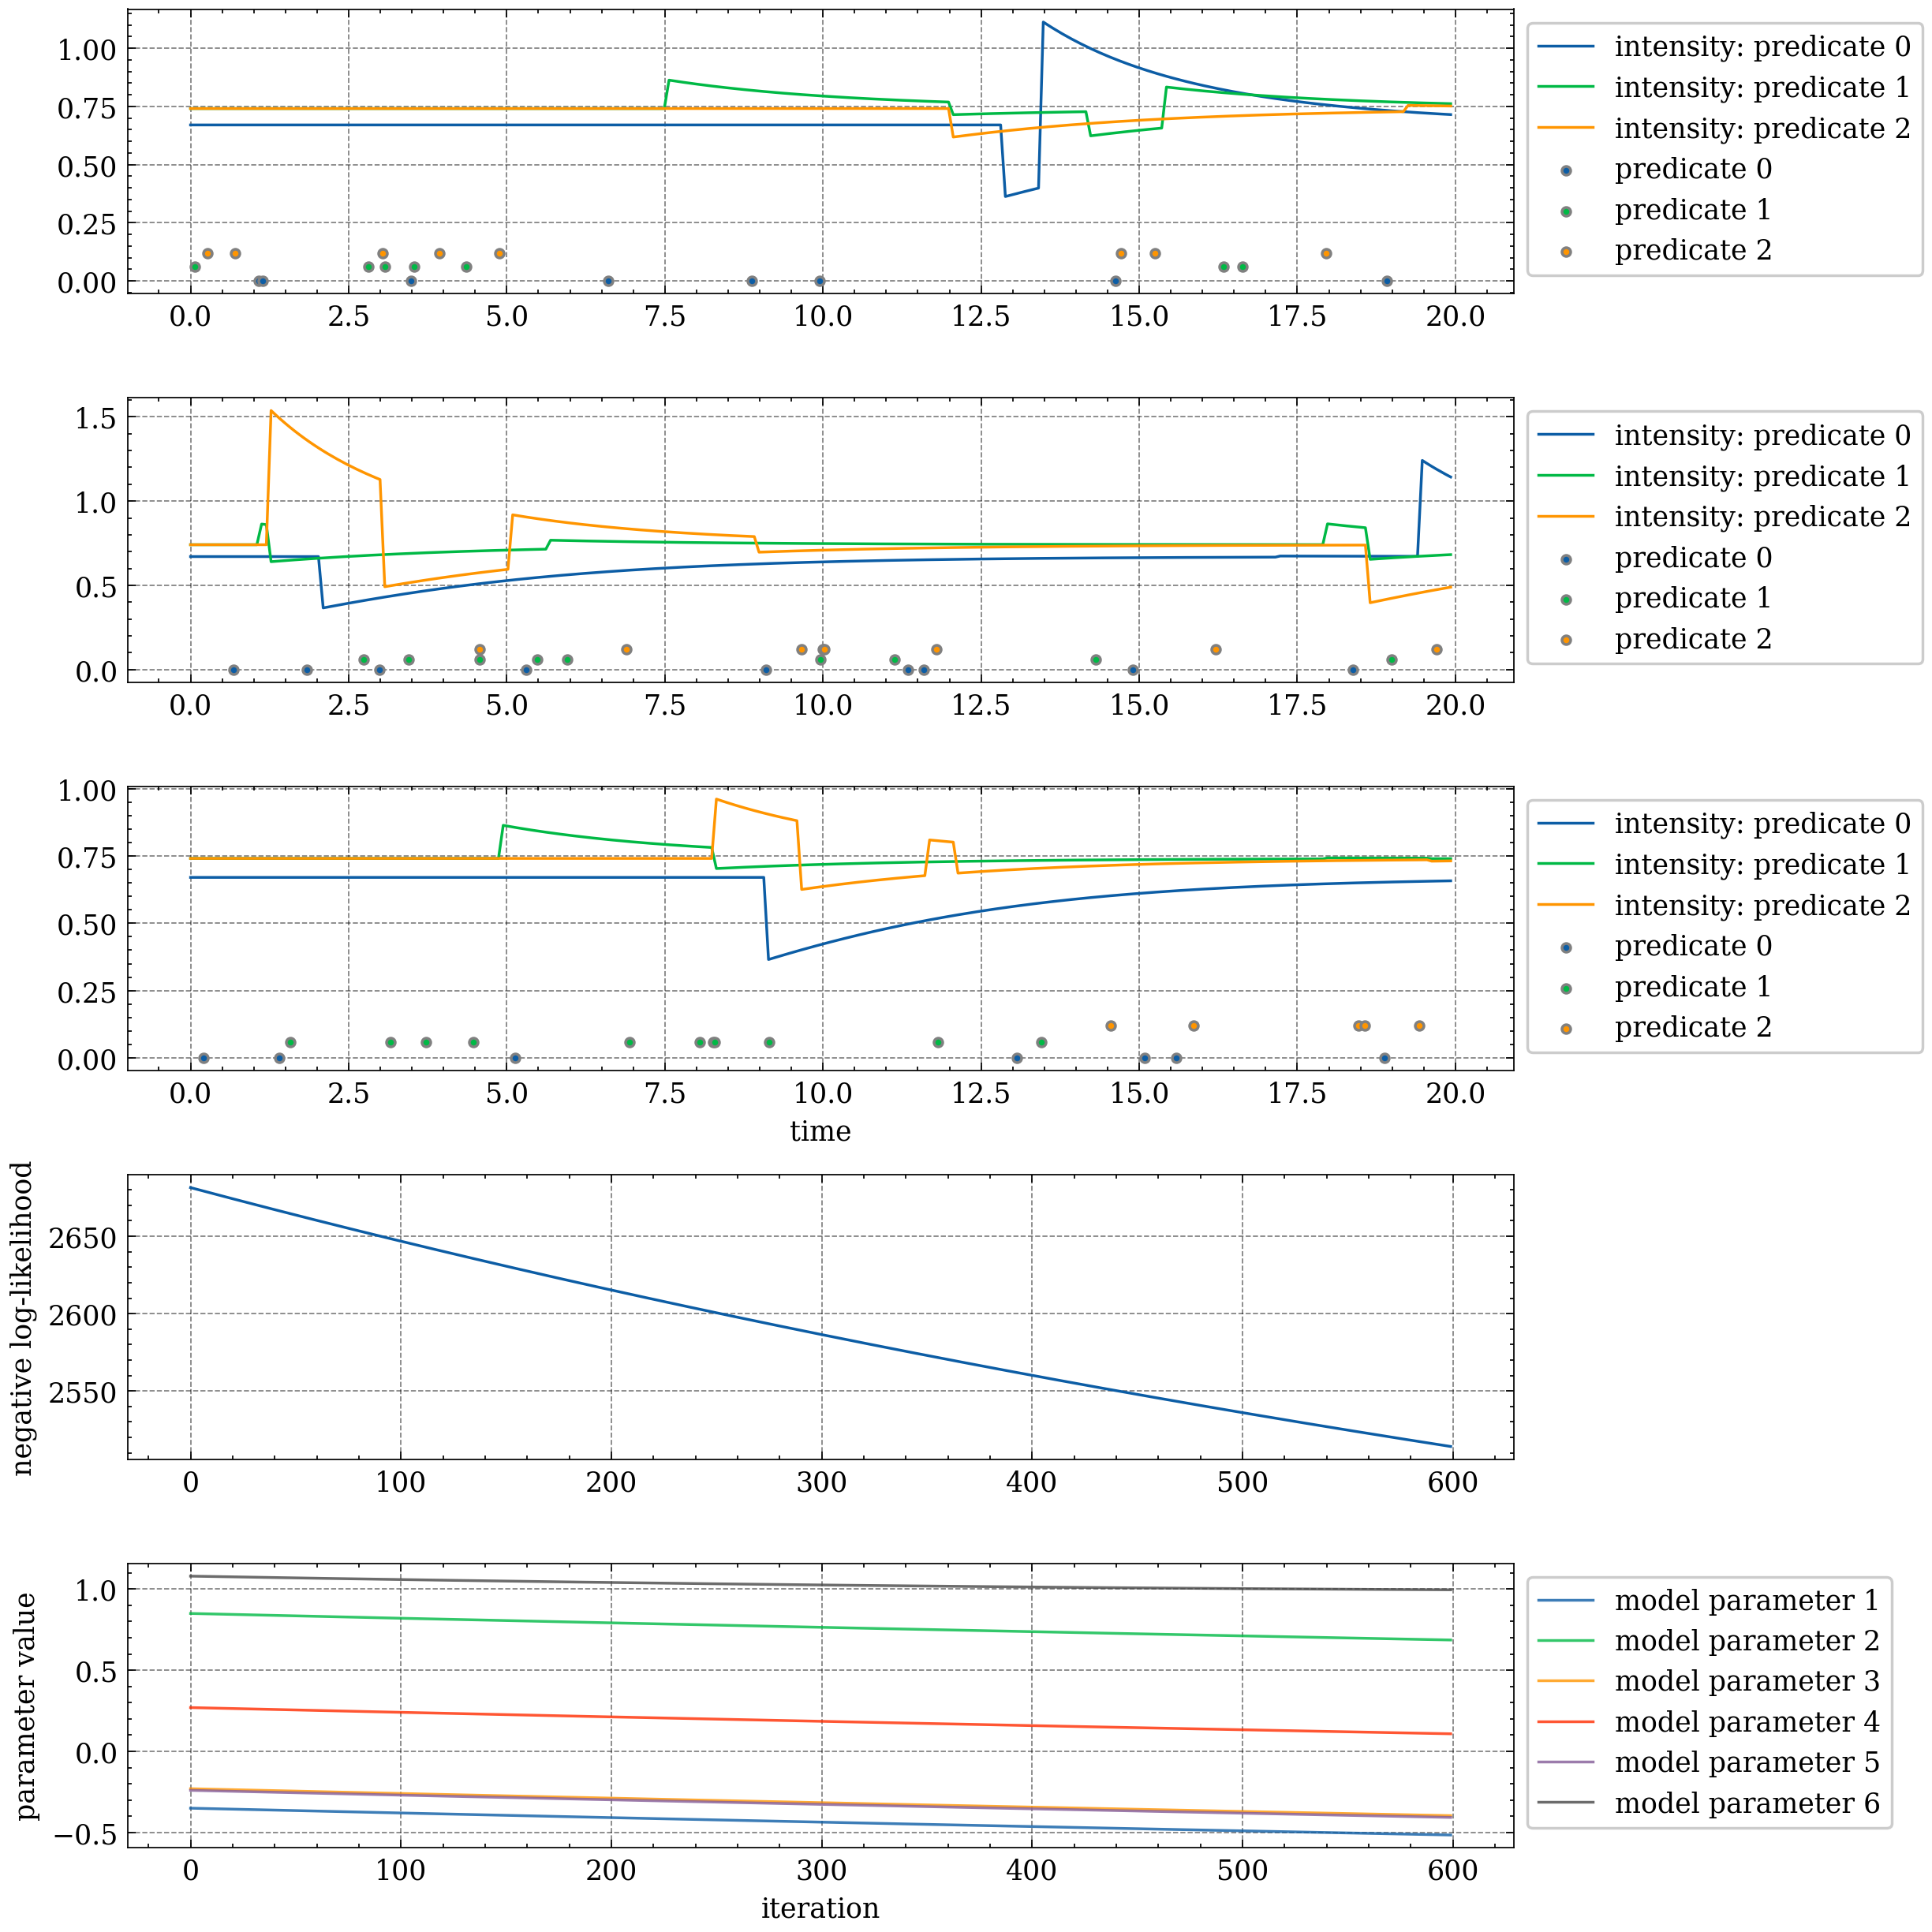

In [2]:
plt.figure(figsize=(10,10), dpi=250)
plt.subplot(511)
for predicate_idx in data[0]:
    tmp = intensity[0][predicate_idx]
    time = data[0][predicate_idx]['time']
    plt.scatter(time[1:], 0.06*predicate_idx * np.ones(shape=len(time[1:])), label='predicate {}'.format(predicate_idx),s=10,edgecolors='gray')
    plt.plot(np.arange(0,20,20/len(intensity[0][predicate_idx])),tmp,label='intensity: predicate {}'.format(predicate_idx))
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(512)
for predicate_idx in data[1]:
    tmp = intensity[4][predicate_idx]
    time = data[4][predicate_idx]['time']
    plt.scatter(time[1:], 0.06*predicate_idx * np.ones(shape=len(time[1:])), label='predicate {}'.format(predicate_idx),s=10,edgecolors='gray')
    plt.plot(np.arange(0,20,20/len(intensity[0][predicate_idx])),tmp,label='intensity: predicate {}'.format(predicate_idx))
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(513)
for predicate_idx in data[2]:
    tmp = intensity[5][predicate_idx]
    time = data[5][predicate_idx]['time']
    plt.scatter(time[1:], 0.06*predicate_idx * np.ones(shape=len(time[1:])), label='predicate {}'.format(predicate_idx),s=10,edgecolors='gray')
    plt.plot(np.arange(0,20,20/len(intensity[0][predicate_idx])),tmp,label='intensity: predicate {}'.format(predicate_idx))
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('time')
plt.subplot(514)
plt.plot(losses)
plt.ylabel('negative log-likelihood')

plt.subplot(515)
for i in range(len(params[0])):
    plt.plot([item[i] for item in params], label='model parameter {}'.format(i+1),alpha=0.8)
plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('iteration'); plt.ylabel('parameter value')
plt.tight_layout()

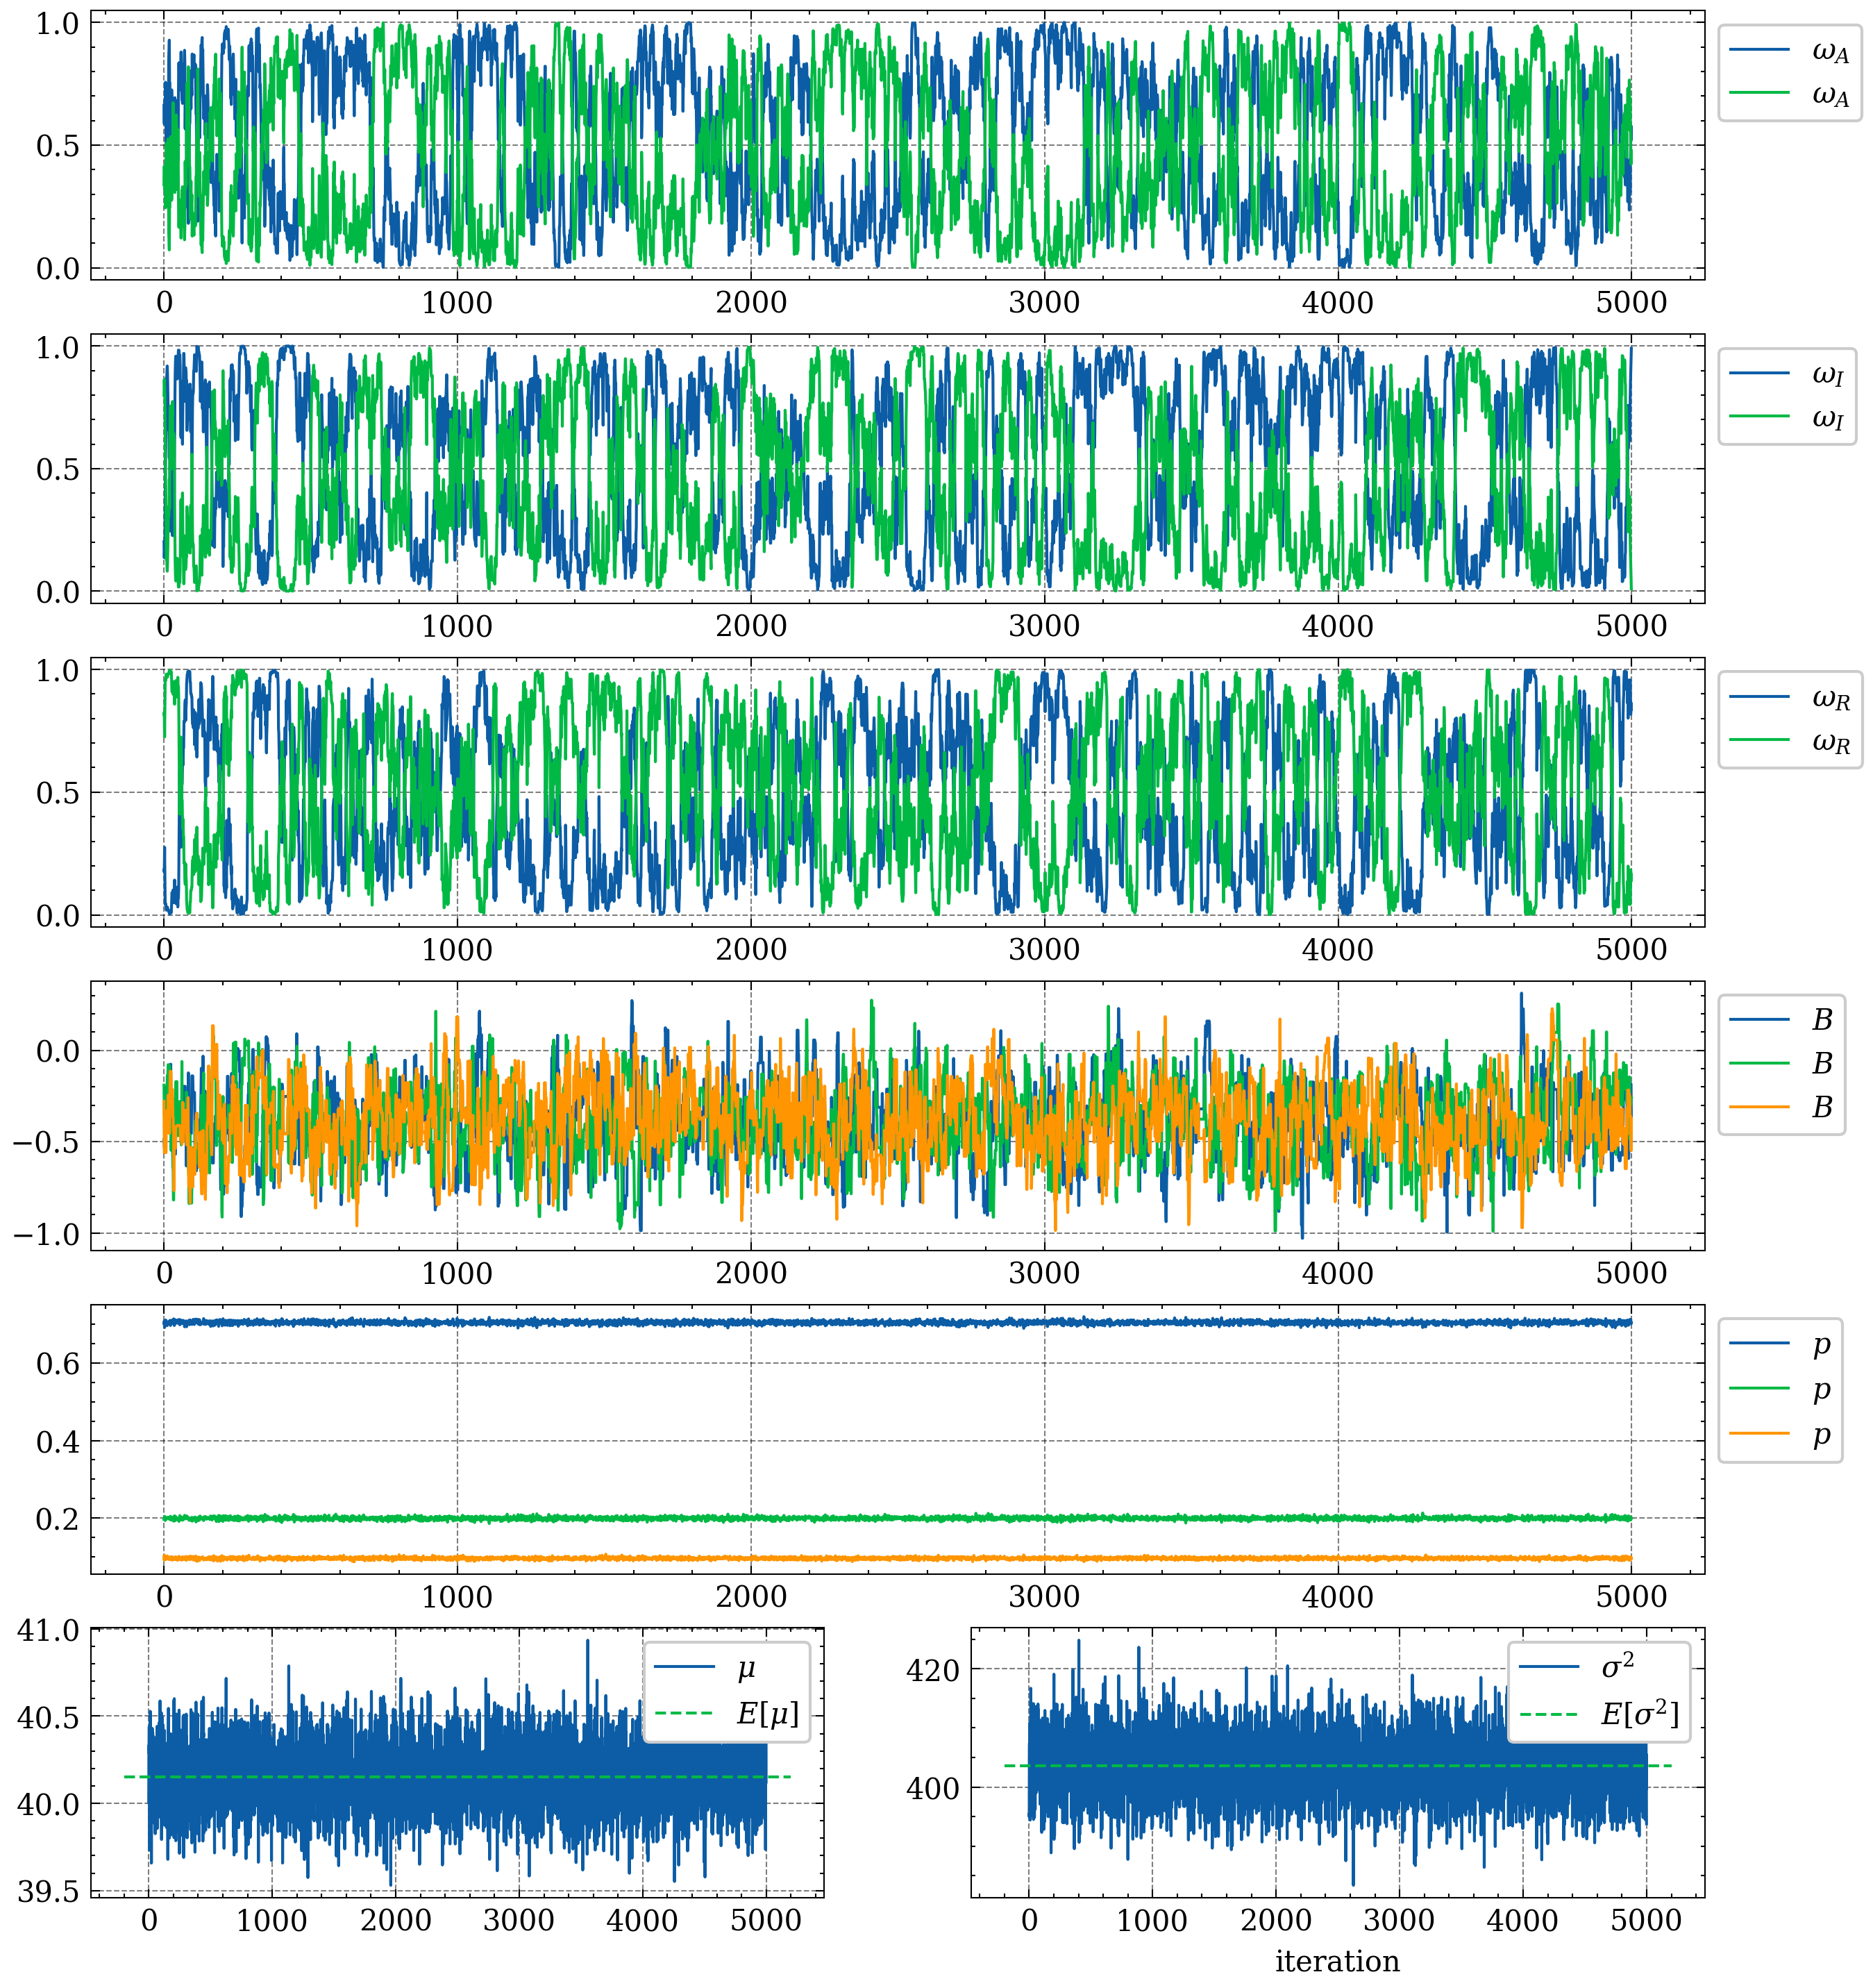

In [3]:
import matplotlib.gridspec as gridspec
omegaA = Bayesian_results['omegaA']
omegaI = Bayesian_results['omegaI']
omegaR = Bayesian_results['omegaR']
B = Bayesian_results['B']
p = Bayesian_results['p']
mu = Bayesian_results['mu']
sigmasq = Bayesian_results['sigmasq']

plt.figure(figsize=(10,12),dpi=300)
gs=gridspec.GridSpec(6,2)
ax1=plt.subplot(gs[0,:])
ax1.plot(omegaA[::],label=r'$\omega_A$')
ax1.legend(bbox_to_anchor=(1,1))
ax1=plt.subplot(gs[1,:])
ax1.plot(omegaI[::],label=r'$\omega_I$')
ax1.legend(bbox_to_anchor=(1,1))
ax1=plt.subplot(gs[2,:])
ax1.plot(omegaR[::],label=r'$\omega_R$')
ax1.legend(bbox_to_anchor=(1,1))
ax1=plt.subplot(gs[3,:])
ax1.plot(B[::],label=r'$B$')
ax1.legend(bbox_to_anchor=(1,1))
ax1=plt.subplot(gs[4,:])
ax1.plot(p,label=r'$p$')
ax1.legend(bbox_to_anchor=(1,1))
ax1=plt.subplot(gs[5,:1])
ax1.plot(mu,label=r'$\mu$')
ax1.plot((-200,5200),(np.array(mu).mean(),np.array(mu).mean()),'--',label=r'$E[\mu]$')
ax1.legend(loc='best')
ax1=plt.subplot(gs[5,1:])
ax1.plot(sigmasq, label=r'$\sigma^2$')
ax1.plot((-200,5200),(np.array(sigmasq).mean(),np.array(sigmasq).mean()),'--',label=r'$E[\sigma^2]$')
ax1.legend(loc='best')
plt.xlabel('iteration');
#plt.tight_layout()

In [4]:
replicated_data = np.load('data\replicated_data.npy',allow_pickle=True).item()
replicated_intensity = np.load('data\replicated_intensity.npy',allow_pickle=True).item()

f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


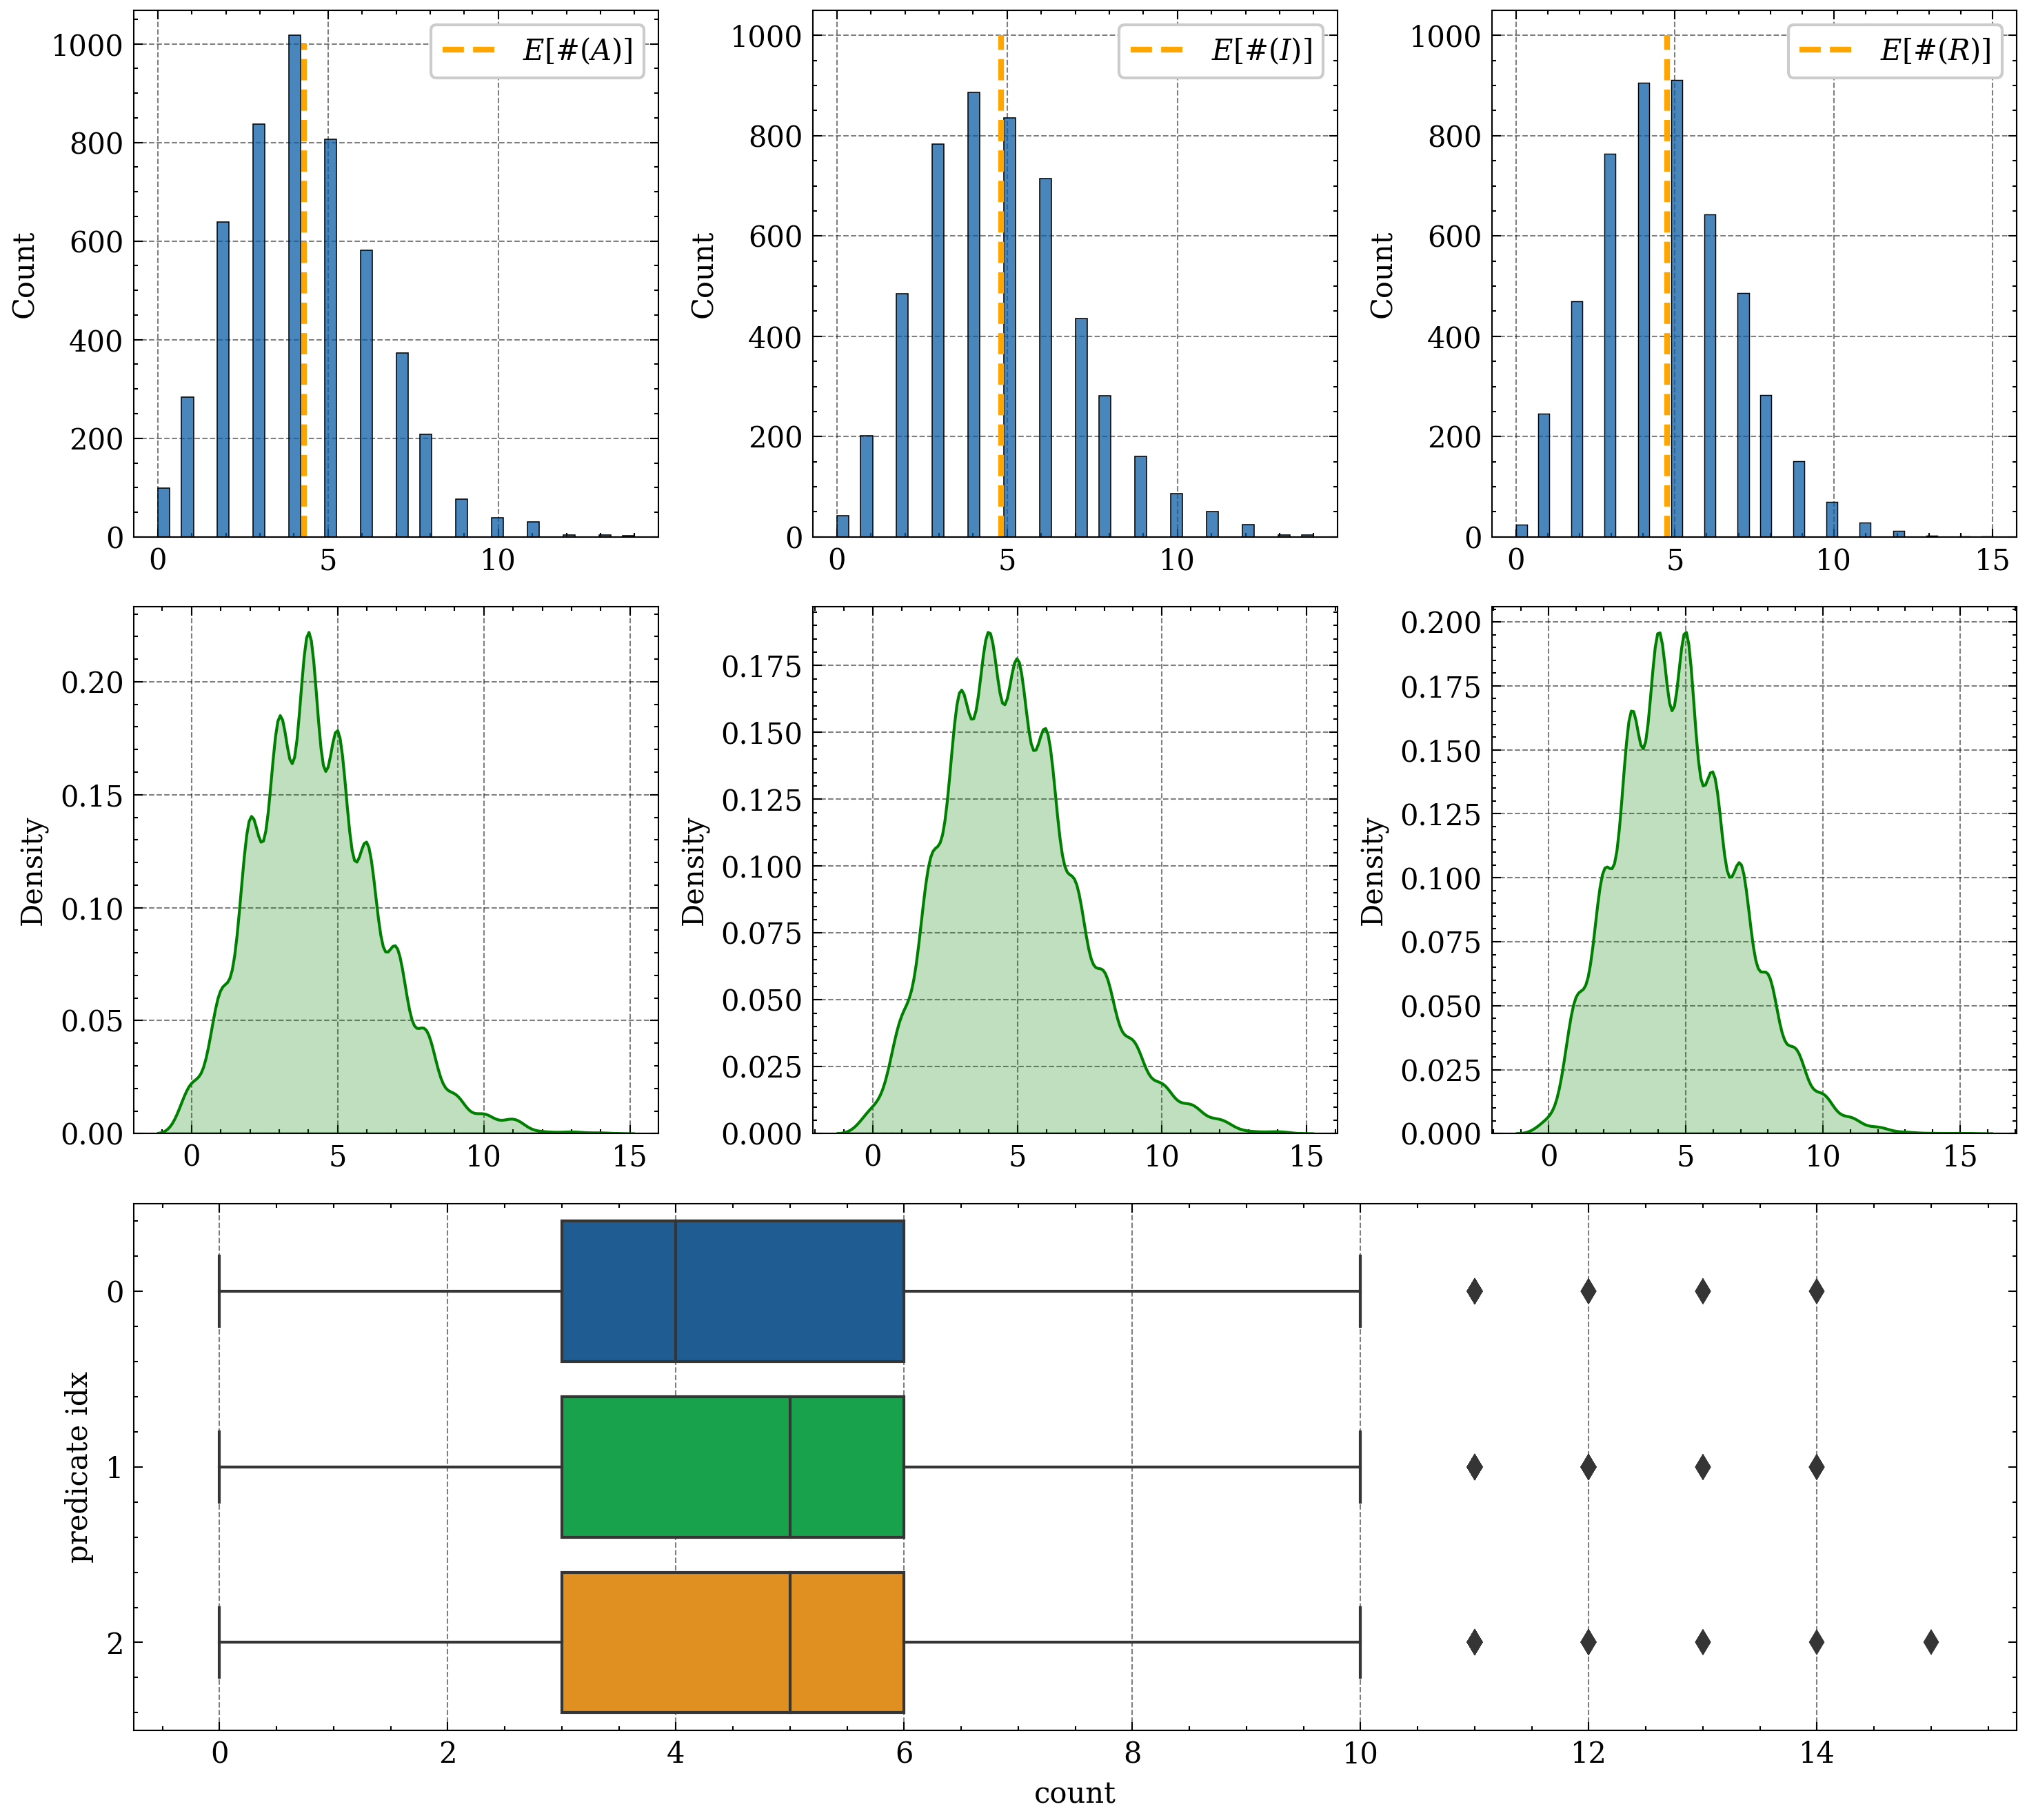

In [5]:
import seaborn as sns
import pandas as pd

def count_events(data):
    count = []
    for sample_ID in data:
        count_A = count_I = count_R = 0
        for predicate_idx in data[sample_ID]:
            if predicate_idx == 0: count_A += len(data[sample_ID][predicate_idx]['state'][1:])
            if predicate_idx == 1: count_I += len(data[sample_ID][predicate_idx]['state'][1:])
            if predicate_idx == 2: count_R += len(data[sample_ID][predicate_idx]['state'][1:])
        count.append( (count_A, count_I, count_R) )
    return count

count = count_events(replicated_data)
plt.figure(figsize=(10,9),dpi=300)
count_A = [item[0] for item in count]
count_I = [item[1] for item in count]
count_R = [item[2] for item in count]

count_ = count_events(data)
count_A_ = [item[0] for item in count]
count_I_ = [item[1] for item in count]
count_R_ = [item[2] for item in count]
mean_A = np.array(count_A_).mean()
mean_I = np.array(count_I_).mean()
mean_R = np.array(count_R_).mean()

gs=gridspec.GridSpec(3,3)
ax1=plt.subplot(gs[0,:1])
sns.histplot(count_A)
ax1.plot((mean_A,mean_A),(0,1000),'--',c='orange',lineWidth=2,label=r'$E[\#(A)]$')
plt.legend(loc='best')
ax1=plt.subplot(gs[0,1:2])
sns.histplot(count_I)
ax1.plot((mean_I,mean_I),(0,1000),'--',c='orange',lineWidth=2,label=r'$E[\#(I)]$')
plt.legend(loc='best')
ax1=plt.subplot(gs[0,2:])
sns.histplot(count_R)
plt.plot((mean_R,mean_R),(0,1000),'--',c='orange',lineWidth=2,label=r'$E[\#(R)]$')
plt.legend(loc='best')
ax1=plt.subplot(gs[1,:1])
sns.kdeplot(count_A,shade=True,color='g')
ax1=plt.subplot(gs[1,1:2])
sns.kdeplot(count_I,shade=True,color='g')
ax1=plt.subplot(gs[1,2:])
sns.kdeplot(count_R,shade=True,color='g')
ax1=plt.subplot(gs[2,:])
df = pd.DataFrame(count)
sns.boxplot(data=df[[0,1,2]],orient='h')
ax1.set_xlabel('count')
ax1.set_ylabel('predicate idx')
plt.tight_layout()

In [6]:
#TODO: Replicated Data from Bayesian
rep_data = np.load('data\data_collection.npy',allow_pickle=True)

In [7]:
from generation import Logic_Model_Generator
np.random.seed(123)
gen = Logic_Model_Generator(mu=40,sigma=20,alpha=np.array([7,2,1]))
generated_data = gen.generate_data(512,20)

In [8]:
count1 = count_events(generated_data)
count_A1 = [item[0] for item in count1]
count_I1 = [item[1] for item in count1]
count_R1 = [item[2] for item in count1]
mean_A1 = np.array(count_A1).mean()
mean_I1 = np.array(count_I1).mean()
mean_R1 = np.array(count_R1).mean()
var_A1 = np.array(count_A1).var()
var_I1 = np.array(count_I1).var()
var_R1 = np.array(count_R1).var()
var_A1,var_I1,var_R1

(9.746810913085938, 9.006587982177734, 6.360164642333984)

f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor 

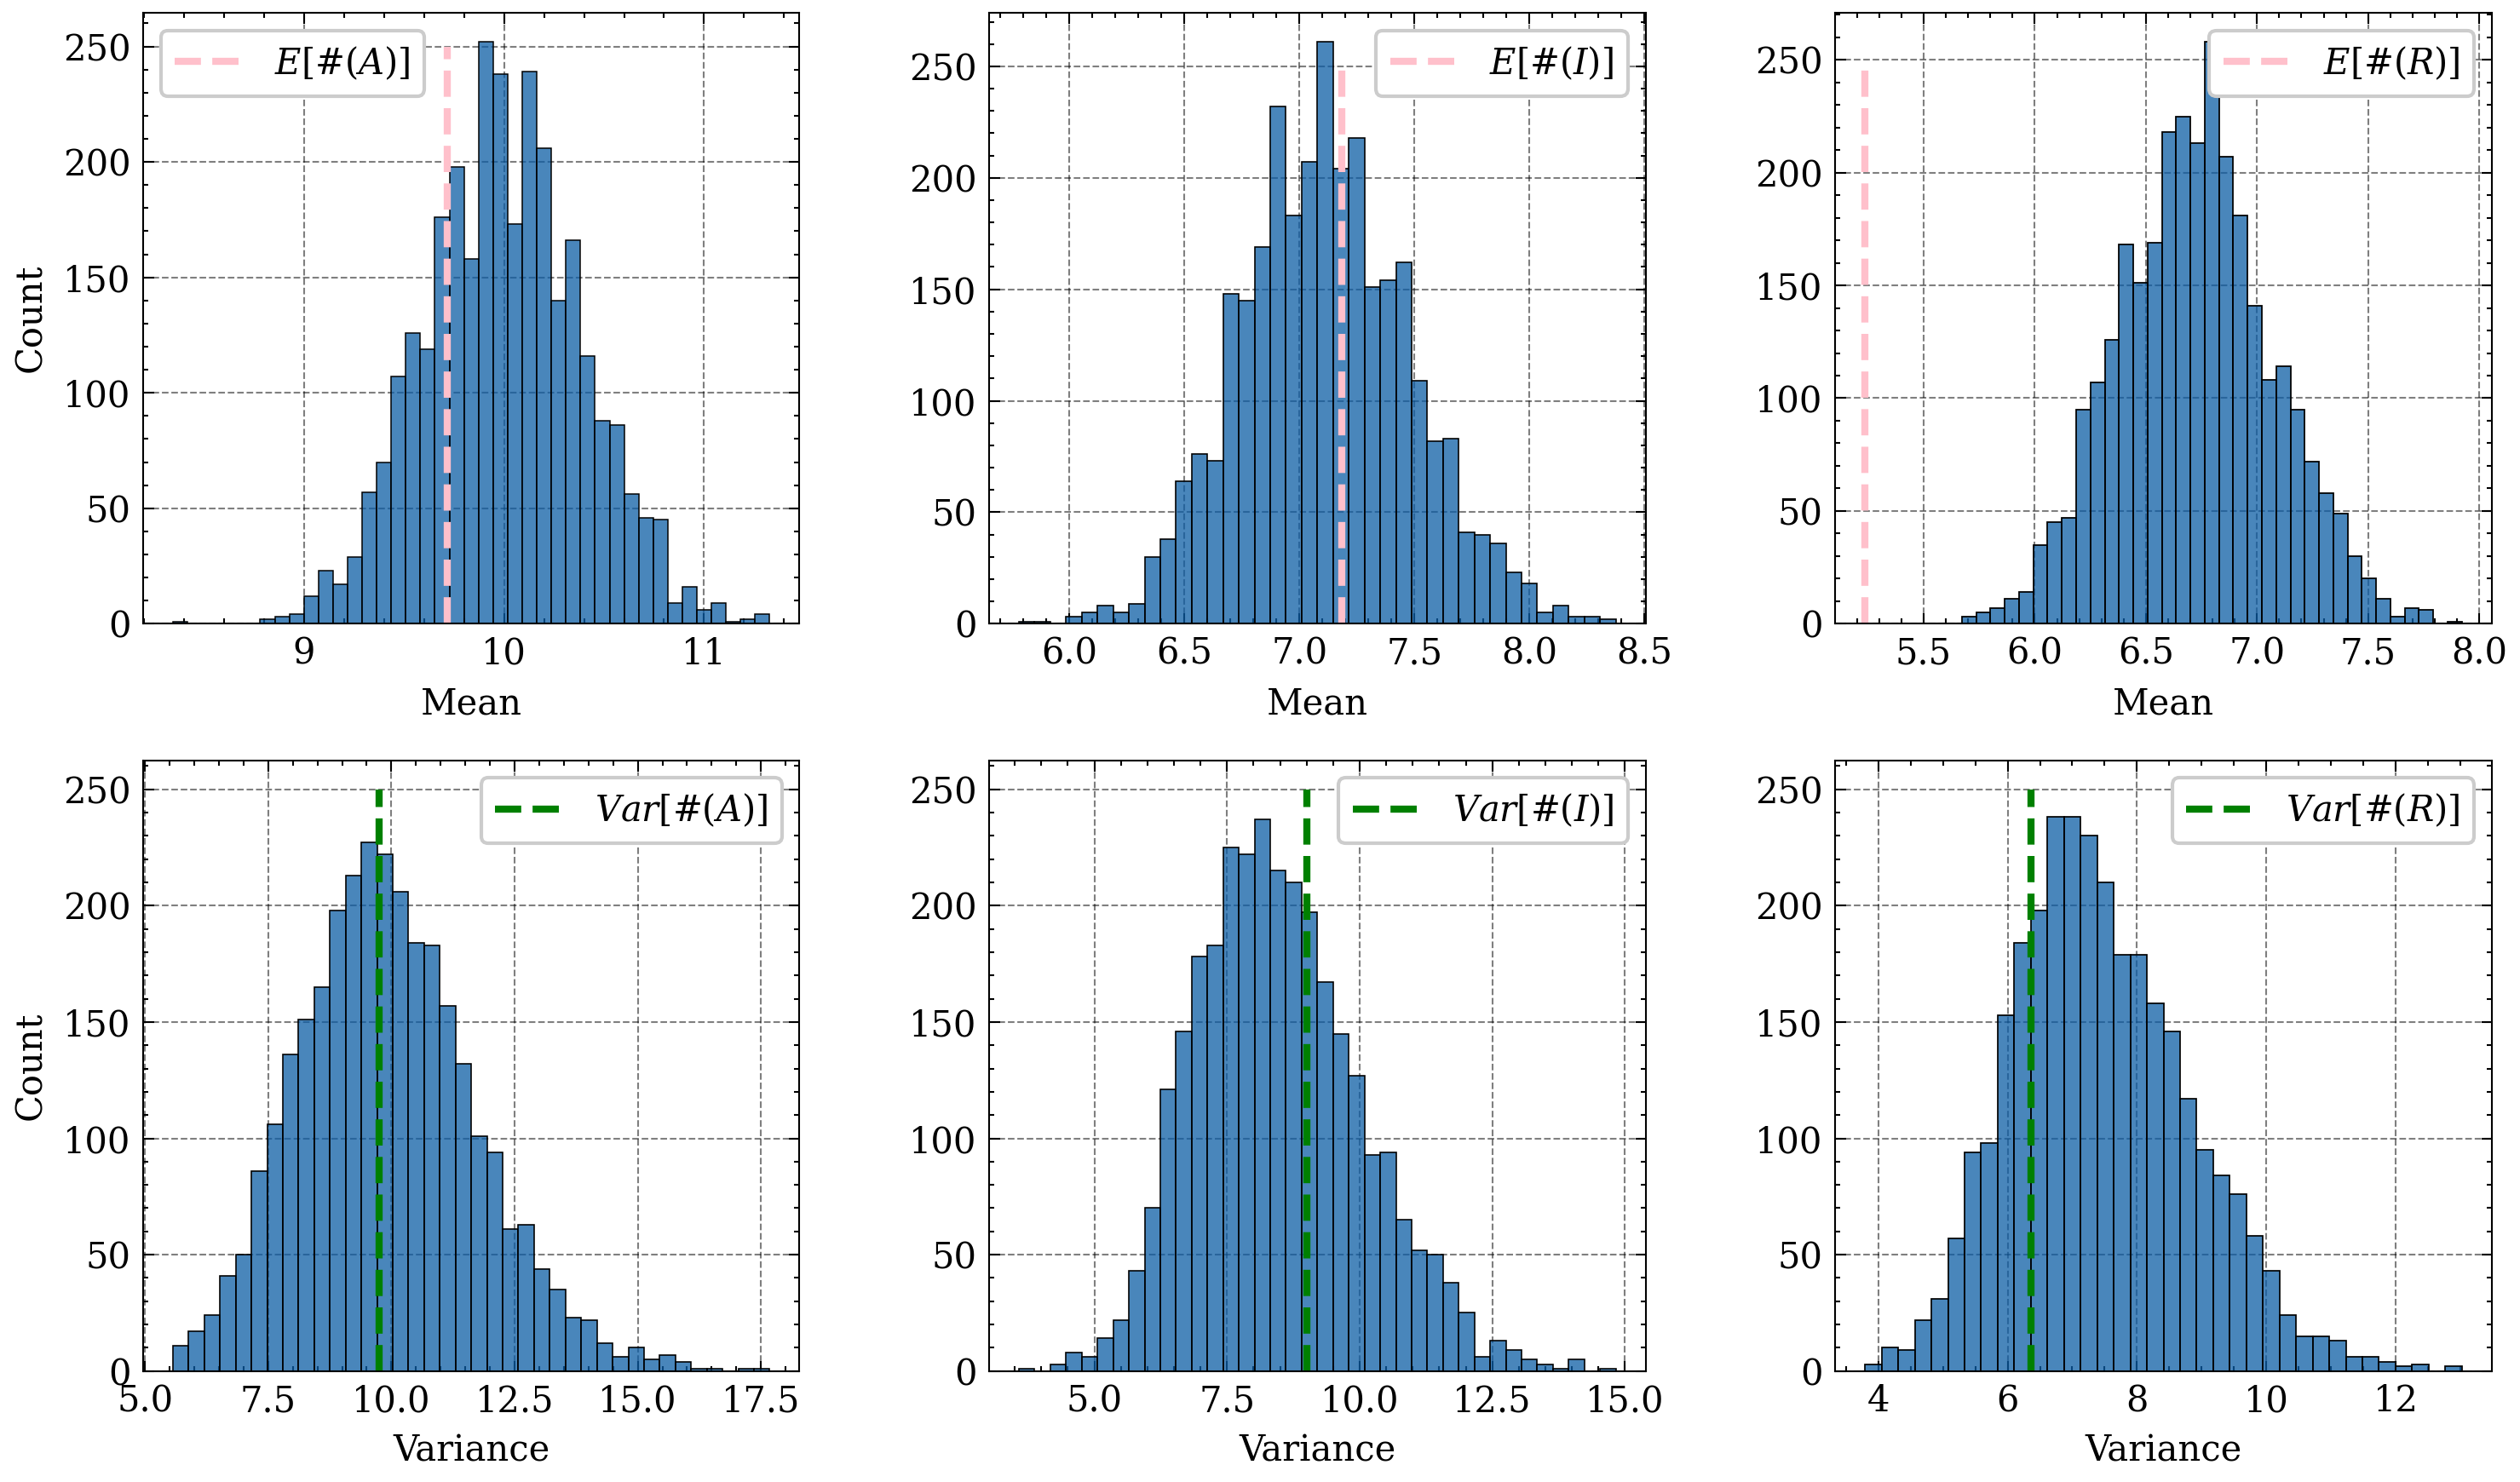

In [9]:
def count_events(data):
    count = []
    for sample_ID in data:
        count_A = count_I = count_R = 0
        for predicate_idx in data[sample_ID]:
            if predicate_idx == 0: count_A += len(data[sample_ID][predicate_idx]['state'][1:])
            if predicate_idx == 1: count_I += len(data[sample_ID][predicate_idx]['state'][1:])
            if predicate_idx == 2: count_R += len(data[sample_ID][predicate_idx]['state'][1:])
        count.append( (count_A, count_I, count_R) )
    return count

results = []
for i in range(len(rep_data)):
    count = count_events(rep_data[i])
    count_A = np.array([item[0] for item in count])
    count_I = np.array([item[1] for item in count])
    count_R = np.array([item[2] for item in count])
    results.append( (count_A.mean(), count_I.mean(), count_R.mean(), count_A.var(), count_I.var(), count_R.var(), count_A.max(),count_I.max(),count_R.max()) )

plt.figure(figsize=(10,6),dpi=300)
gs=gridspec.GridSpec(2,3)
ax1=plt.subplot(gs[0,:1])
sns.histplot([item[0] for item in results])
ax1.plot((mean_A1,mean_A1),(0,250),'--',c='pink',lineWidth=2,label=r'$E[\#(A)]$')
plt.legend(loc='best')
plt.xlabel('Mean')
ax1=plt.subplot(gs[0,1:2])
sns.histplot([item[1] for item in results])
ax1.plot((mean_I1,mean_I1),(0,250),'--',c='pink',lineWidth=2,label=r'$E[\#(I)]$')
plt.legend(loc='best')
plt.xlabel('Mean')
ax1.set_ylabel(' ')
ax1=plt.subplot(gs[0,2:])
ax1.set_ylabel(' ')
sns.histplot([item[2] for item in results])
ax1.plot((mean_R1,mean_R1),(0,250),'--',c='pink',lineWidth=2,label=r'$E[\#(R)]$')
plt.legend(loc='best')
plt.xlabel('Mean')
ax1=plt.subplot(gs[1,:1])
sns.histplot([item[3] for item in results])
ax1.plot((var_A1,var_A1),(0,250),'--',c='green',lineWidth=2,label=r'$Var[\#(A)]$')
plt.legend(loc='best')
plt.xlabel('Variance')
ax1=plt.subplot(gs[1,1:2])
sns.histplot([item[4] for item in results])
ax1.plot((var_I1,var_I1),(0,250),'--',c='green',lineWidth=2,label=r'$Var[\#(I)]$')
plt.legend(loc='best')
plt.xlabel('Variance')
ax1.set_ylabel(' ')
ax1=plt.subplot(gs[1,2:])
sns.histplot([item[5] for item in results])
ax1.plot((var_R1,var_R1),(0,250),'--',c='green',lineWidth=2,label=r'$Var[\#(R)]$')
plt.legend(loc='best')
plt.xlabel('Variance')
ax1.set_ylabel(' ')

plt.tight_layout()

In [10]:
p = np.array(p).mean(axis=0)    #TODO: get the posterior probabilities for disease
mu = np.array(mu).mean()
sigmasq = np.array(sigmasq).mean()

In [11]:
#TODO: assume we do not see the markers, predict them using the posterior distribution
imputed_markers = {}
np.random.seed(123)
for sample_ID in data:
    imputed_markers[sample_ID] = {}
    for predicate_idx in data[sample_ID]:
        n = len(data[sample_ID][predicate_idx]['time'][1:])
        disease_types = np.random.multinomial(n=1,pvals=p,size=n)
        ages = np.random.normal(loc=mu,scale=np.sqrt(sigmasq),size=n)
        imputed_markers[sample_ID][predicate_idx] = np.array(list(zip(disease_types,ages)))

f:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [12]:
match_count = 0
marker_count = 0
SSR = 0
naive_SSR = 0
guess = 20
for sample_ID in generated_data:
    for predicate_idx in generated_data[sample_ID]:
        data_marker = data[sample_ID][predicate_idx]['marker'][1:]
        predicted_marker:list = imputed_markers[sample_ID][predicate_idx]
        for i in range(len(data_marker)):
            marker_count += 1
            data_marker_disease:np.array = data_marker[i][:3]
            predicted_marker_disease:np.array = predicted_marker[i][0]
            if np.argmax(data_marker_disease) == np.argmax(predicted_marker_disease): match_count += 1

            data_marker_age = data_marker[i][-1]
            predicted_marker_age = predicted_marker[i][-1]
            SSR += (data_marker_age-predicted_marker_age)**2
            naive_SSR += (guess - data_marker_age)**2

In [13]:
match_count / marker_count, SSR/marker_count, naive_SSR/match_count

(0.5430659331636424, 789.2289364242719, 1481.2267379031505)

In [14]:
imputed_markers

{0: {0: array([[array([1, 0, 0]), 65.58326859030765],
         [array([1, 0, 0]), 22.741480730520042],
         [array([1, 0, 0]), 26.515147926252354],
         [array([1, 0, 0]), 38.25025779599493],
         [array([0, 1, 0]), 70.11223705326867],
         [array([0, 0, 1]), 27.318360487692157],
         [array([1, 0, 0]), 31.23396711913923],
         [array([1, 0, 0]), 31.427430914942708]], dtype=object),
  1: array([[array([1, 0, 0]), 25.133774616944393],
         [array([1, 0, 0]), 20.368509390223245],
         [array([1, 0, 0]), 25.115346352691695],
         [array([0, 0, 1]), 44.98136037959948],
         [array([1, 0, 0]), 2.8762479994910777],
         [array([0, 1, 0]), 4.406625999926675],
         [array([1, 0, 0]), -15.09445448989382]], dtype=object),
  2: array([[array([1, 0, 0]), 35.448976793717954],
         [array([1, 0, 0]), 32.300296081169385],
         [array([0, 0, 1]), 51.679565252493525],
         [array([1, 0, 0]), 46.95446607562472],
         [array([1, 0, 0]), 39.9

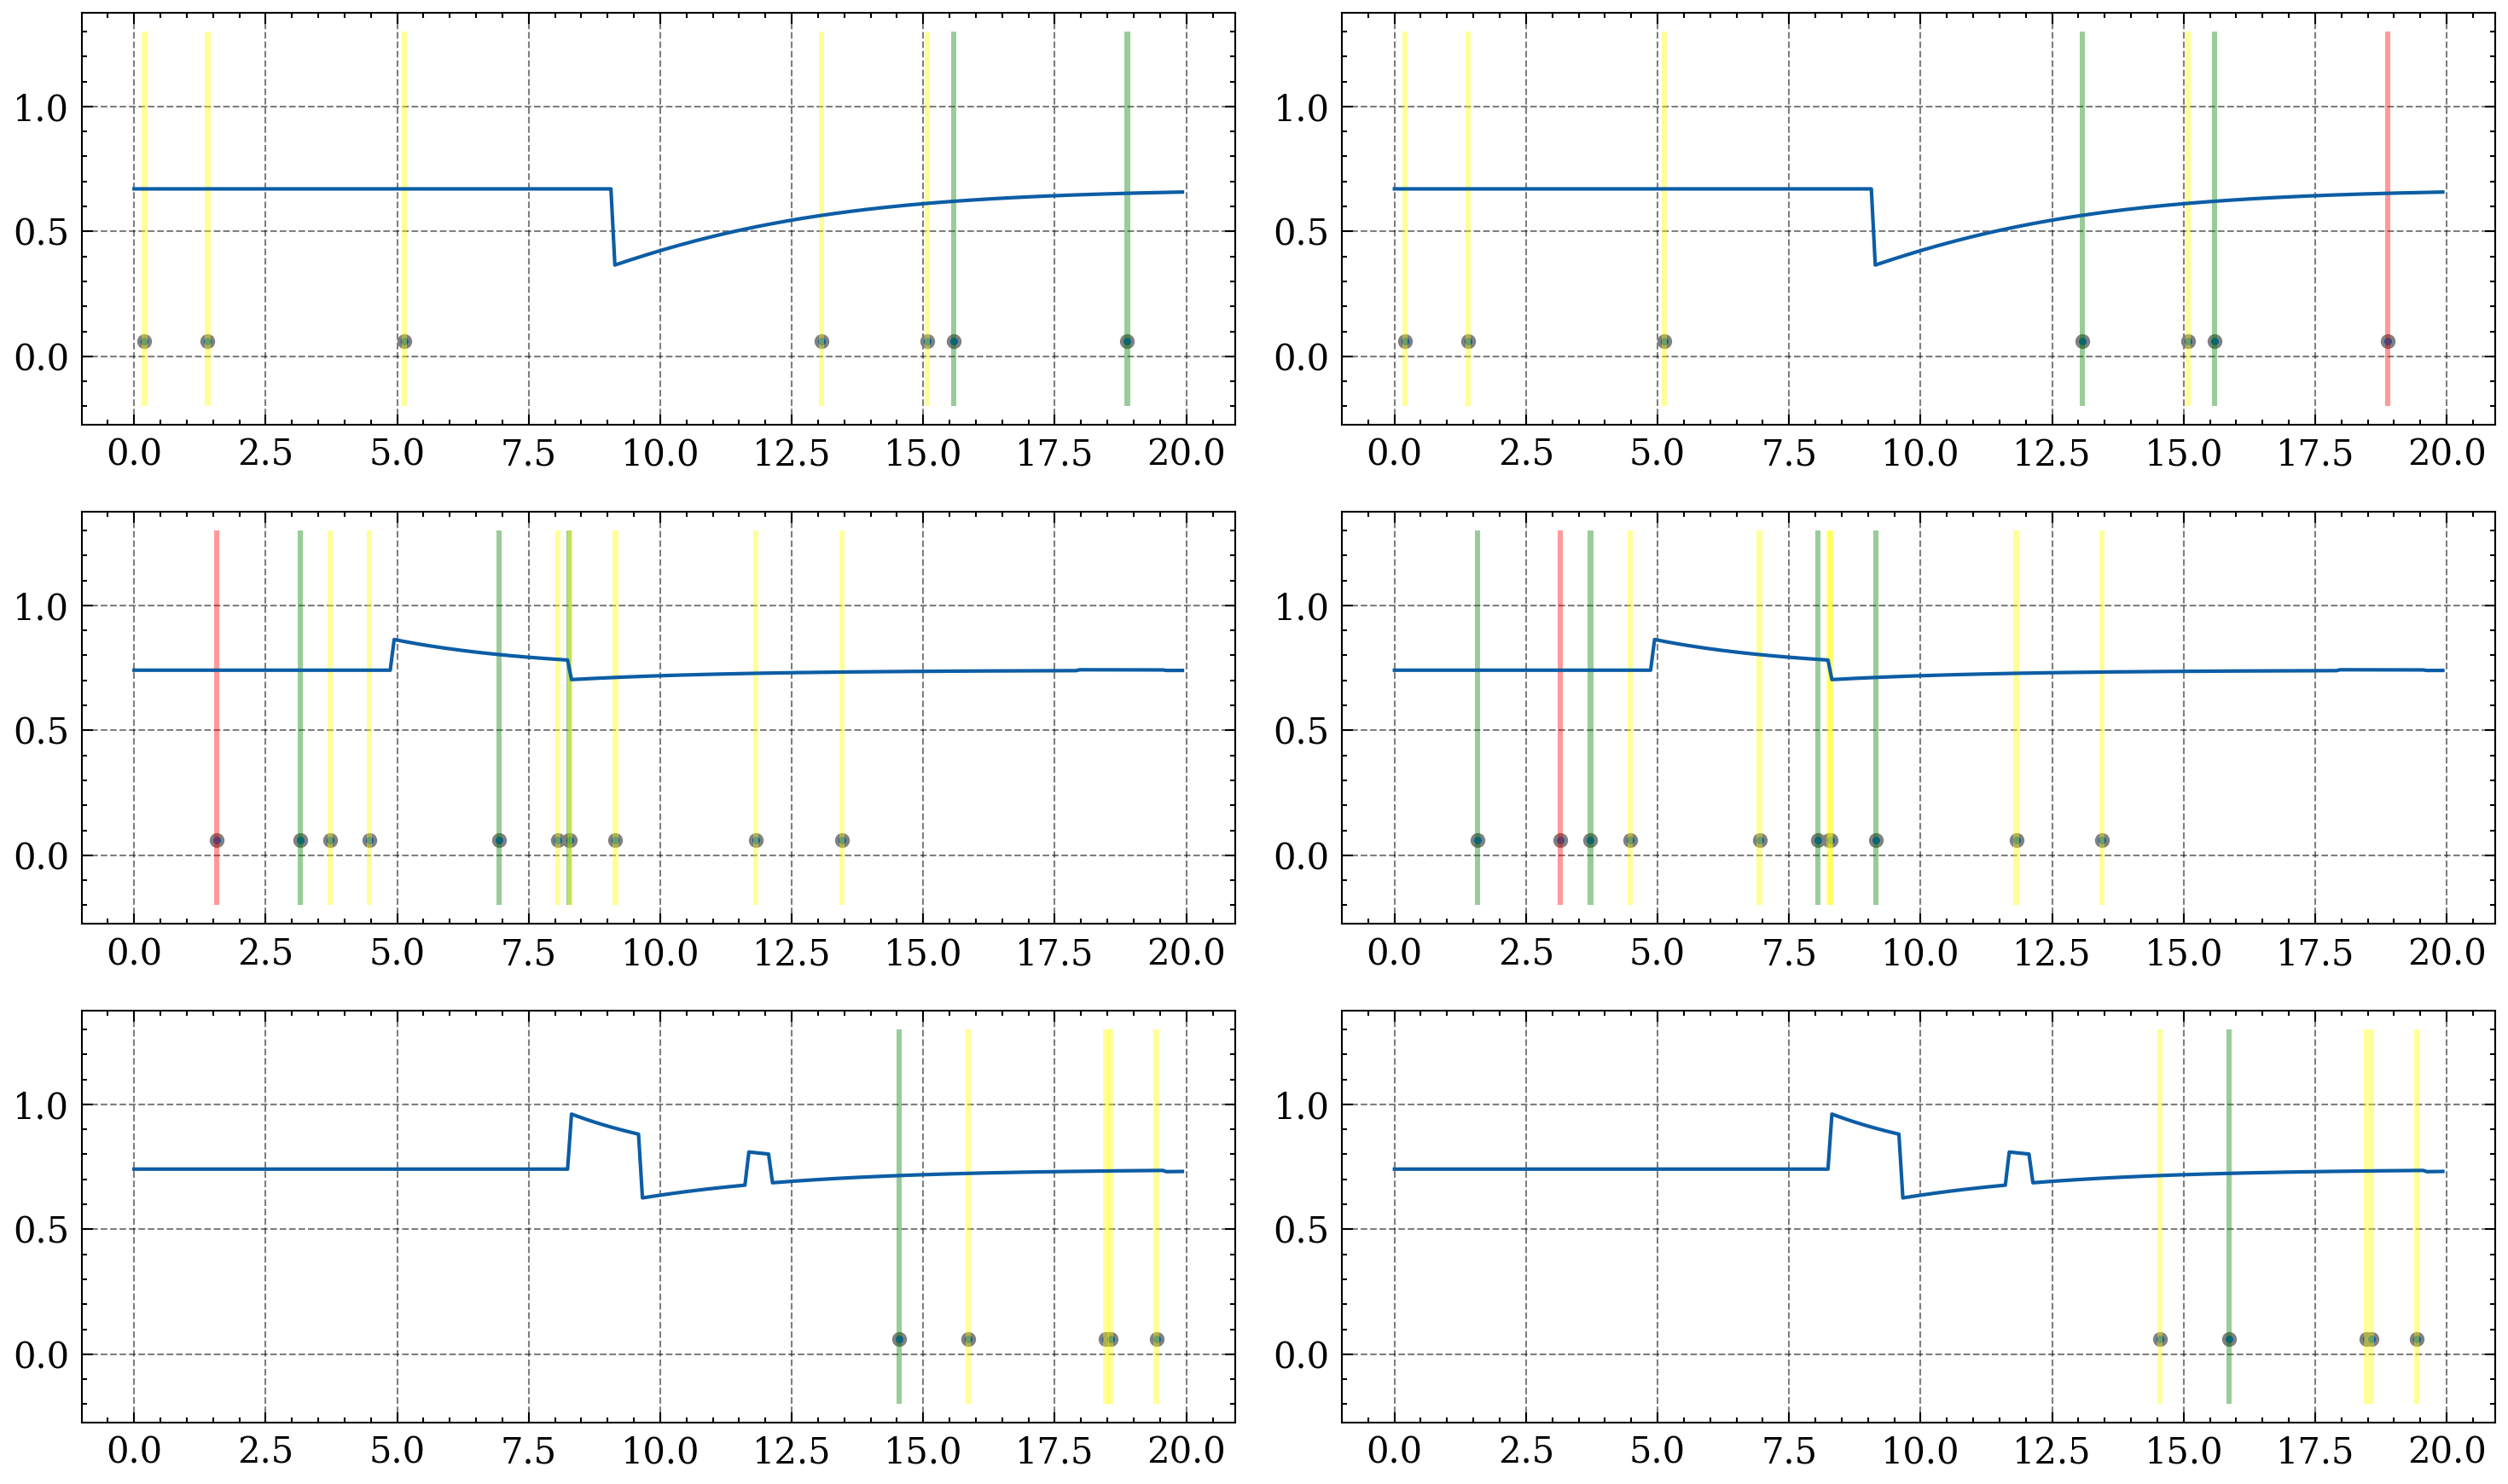

In [15]:
idx=5
delta = 0.05
plt.figure(figsize=(10,6), dpi=300)
plt.subplot(321)
tmp = intensity[idx][0]
time = data[idx][0]['time']
marker = data[idx][0]['marker'][1:]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][0])),tmp,label='intensity: predicate {}'.format(0))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)

plt.subplot(322)
marker = imputed_markers[idx][0]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][0])),tmp,label='intensity: predicate {}'.format(0))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][0]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)

plt.subplot(323)
tmp = intensity[idx][1]
time = data[idx][1]['time']
marker = data[idx][1]['marker'][1:]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(1),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][predicate_idx])),tmp,label='intensity: predicate {}'.format(1))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
#plt.legend(bbox_to_anchor=(1,1))

plt.subplot(324)
marker = imputed_markers[idx][1]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(1),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][predicate_idx])),tmp,label='intensity: predicate {}'.format(1))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][0]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
#plt.legend(bbox_to_anchor=(1,1))

plt.subplot(325)
tmp = intensity[idx][2]
time = data[idx][2]['time']
marker = data[idx][2]['marker'][1:]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][2])),tmp,label='intensity: predicate {}'.format(2))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
#plt.legend(bbox_to_anchor=(1.28,1))

plt.subplot(326)
marker = imputed_markers[idx][2]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][2])),tmp,label='intensity: predicate {}'.format(2))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][0]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)

plt.tight_layout()

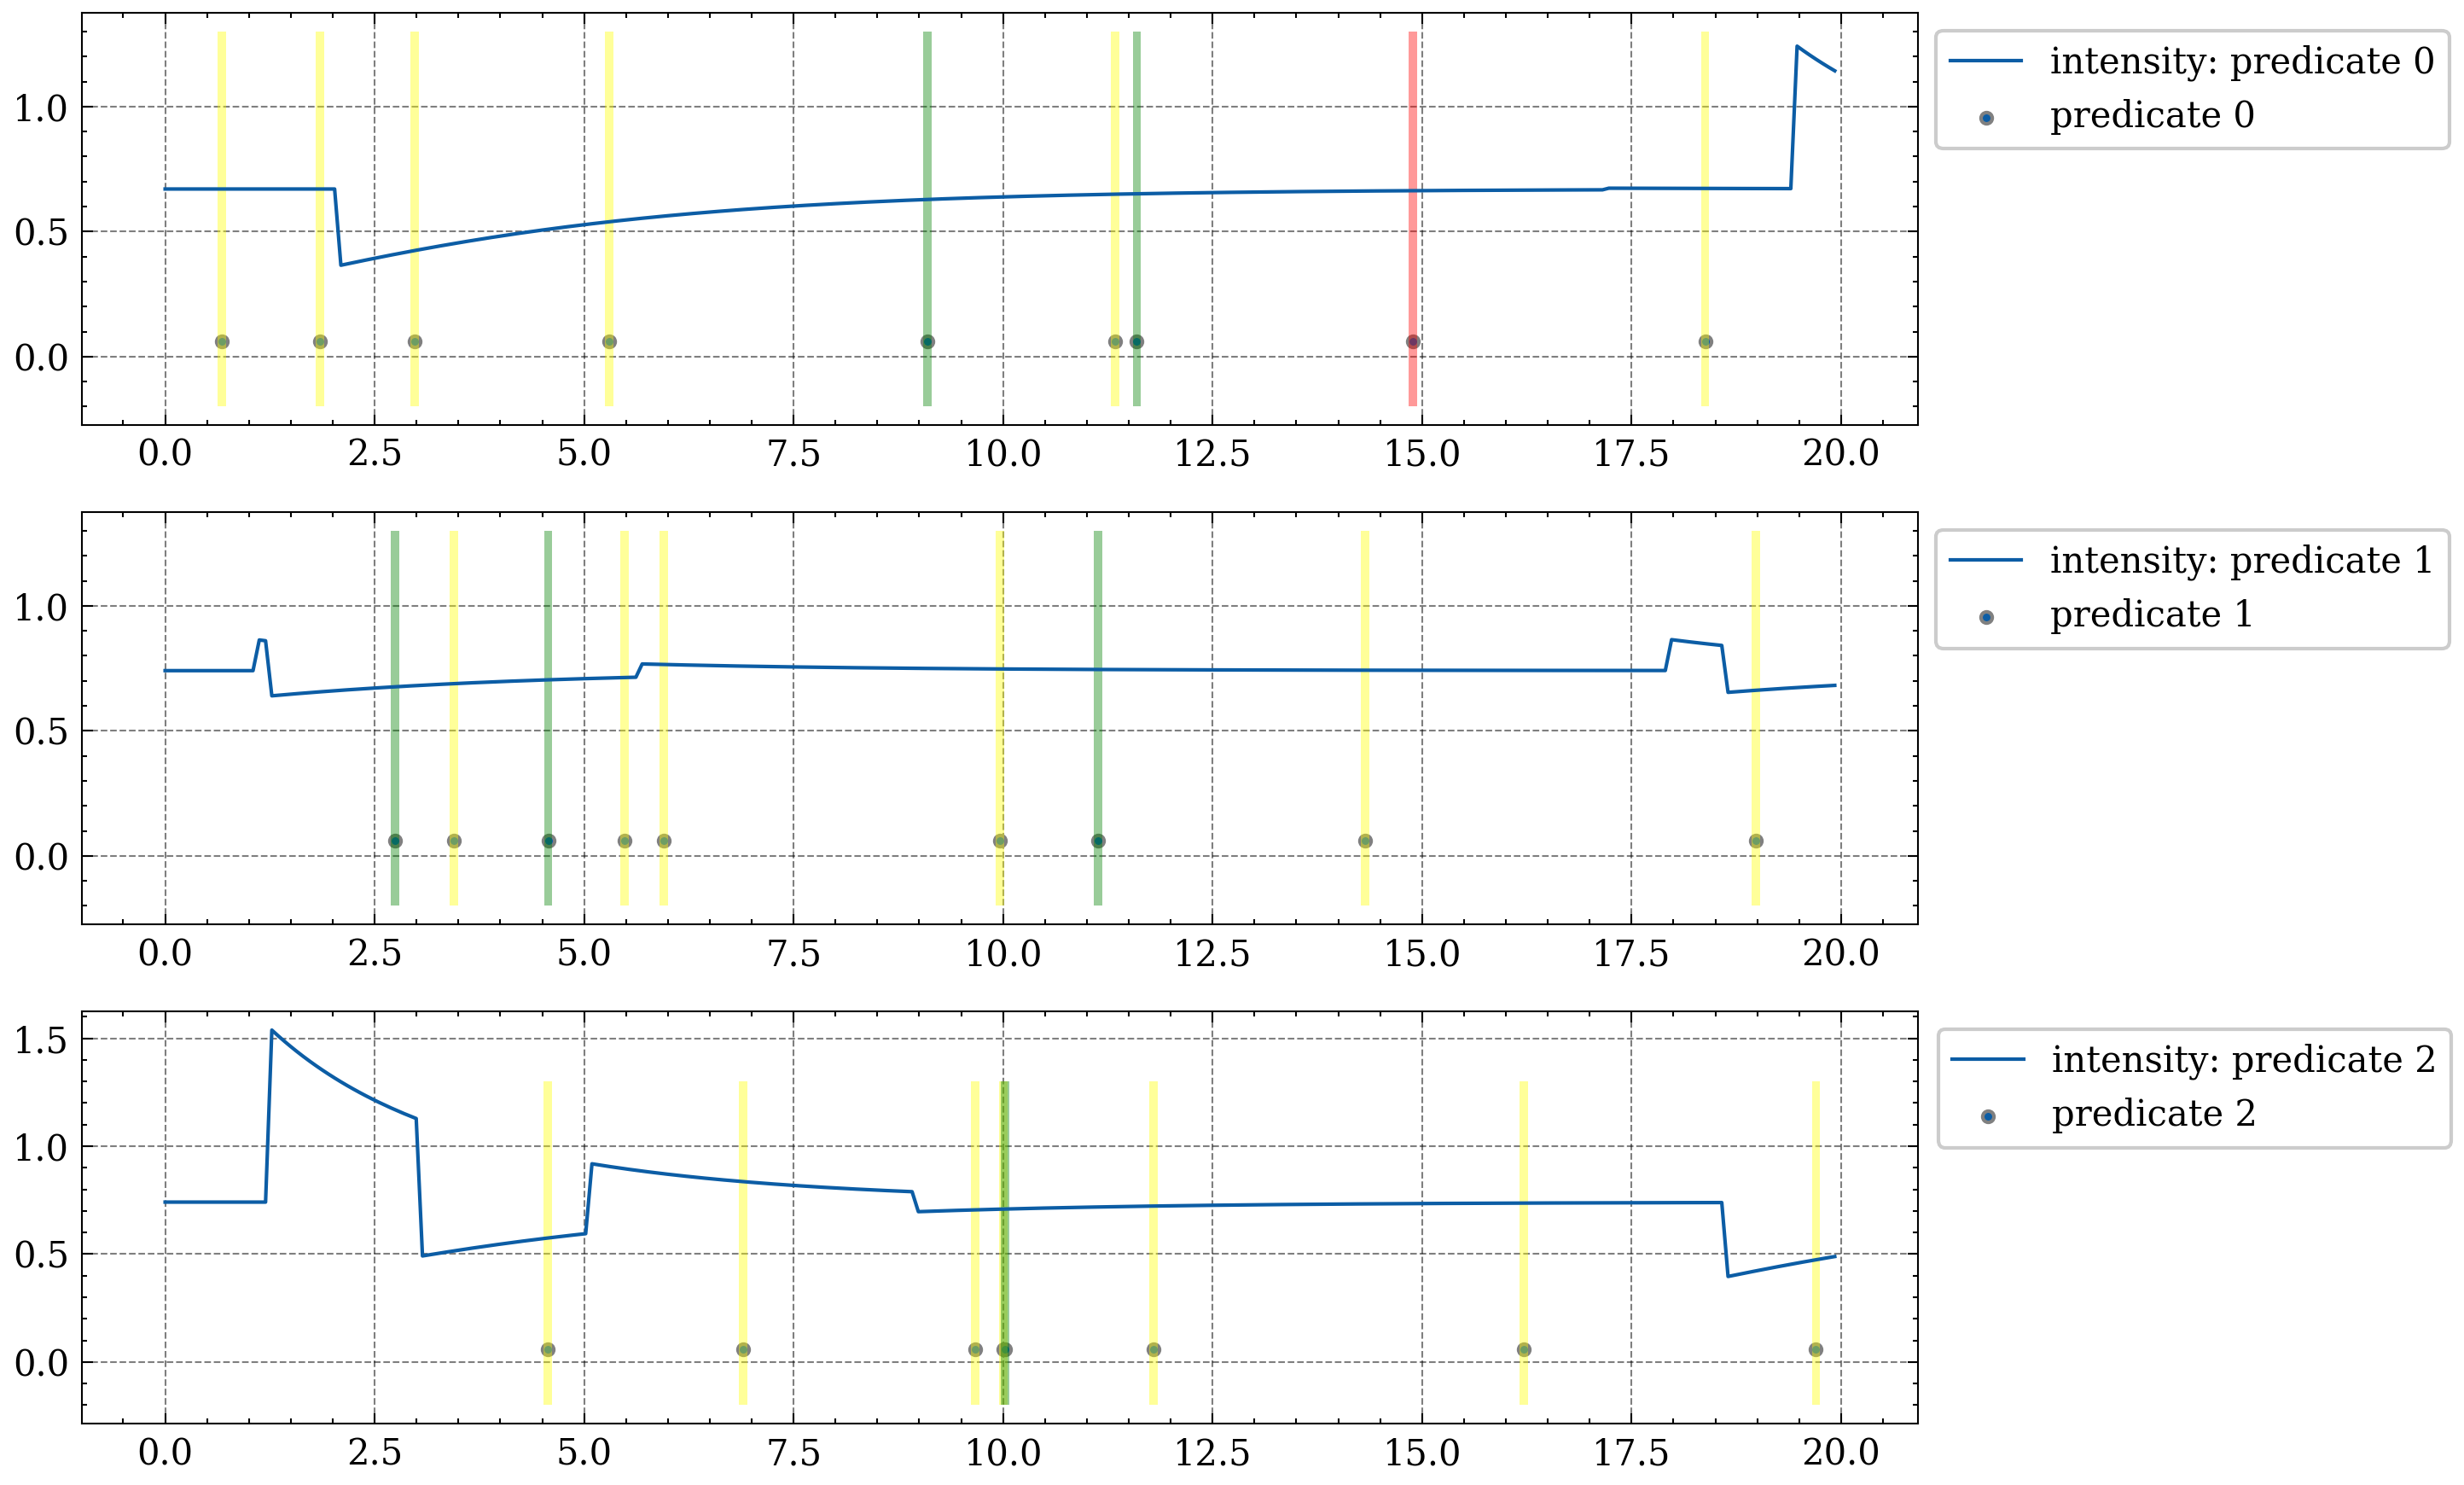

In [16]:
idx=4
delta = 0.05
plt.figure(figsize=(10,6), dpi=300)
plt.subplot(311)
tmp = intensity[idx][0]
time = data[idx][0]['time']
marker = imputed_markers[idx][0]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][0])),tmp,label='intensity: predicate {}'.format(0))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][0]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(312)
tmp = intensity[idx][1]
time = data[idx][1]['time']
marker = imputed_markers[idx][1]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(1),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][predicate_idx])),tmp,label='intensity: predicate {}'.format(1))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][0]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(313)
tmp = intensity[idx][2]
time = data[idx][2]['time']
marker = imputed_markers[idx][2]
plt.scatter(time[1:], 0.06 * np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=10,edgecolors='gray')
plt.plot(np.arange(0,20,20/len(intensity[0][2])),tmp,label='intensity: predicate {}'.format(2))
for j in range(1,len(time)):
    if np.argmax(marker[j-1][0]) == 0: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 1: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][0]) == 2: plt.fill_betweenx(y=np.arange(-0.2,1.4,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.legend(bbox_to_anchor=(1.3,1))
plt.tight_layout()

In [52]:
#TODO: incomplete learning
result_latent_process = np.load('latent_process_result.npy',allow_pickle=True).item()
data_latent_process = np.load('latent_process_data.npy',allow_pickle=True).item()

In [105]:
omega_A =  np.array(result_latent_process['omegaA'])
omega_I =  np.array(result_latent_process['omegaI'])
omega_R =  np.array(result_latent_process['omegaR'])
B = np.array(result_latent_process['B'])
p = np.array(result_latent_process['p'])
mu = np.array(result_latent_process['mu'])
sigmasq = np.array(result_latent_process['sigmasq'])

In [114]:
omega_A[2500::5].mean(axis=0),omega_I[2500::5].mean(axis=0),omega_R[2500::5].mean(axis=0),B[2500::5].mean(axis=0),p.mean(axis=0),mu.mean(),np.sqrt(sigmasq).mean()

(array([0.53754143, 0.46245857]),
 array([0.57377038, 0.42622962]),
 array([0.56616968, 0.43383032]),
 array([-0.37392979, -0.40630387, -0.44049363]),
 array([0.74014326, 0.16308861, 0.09676812]),
 37.13352407552694,
 20.273909396996135)

Text(0.5, 0, 'iteration')

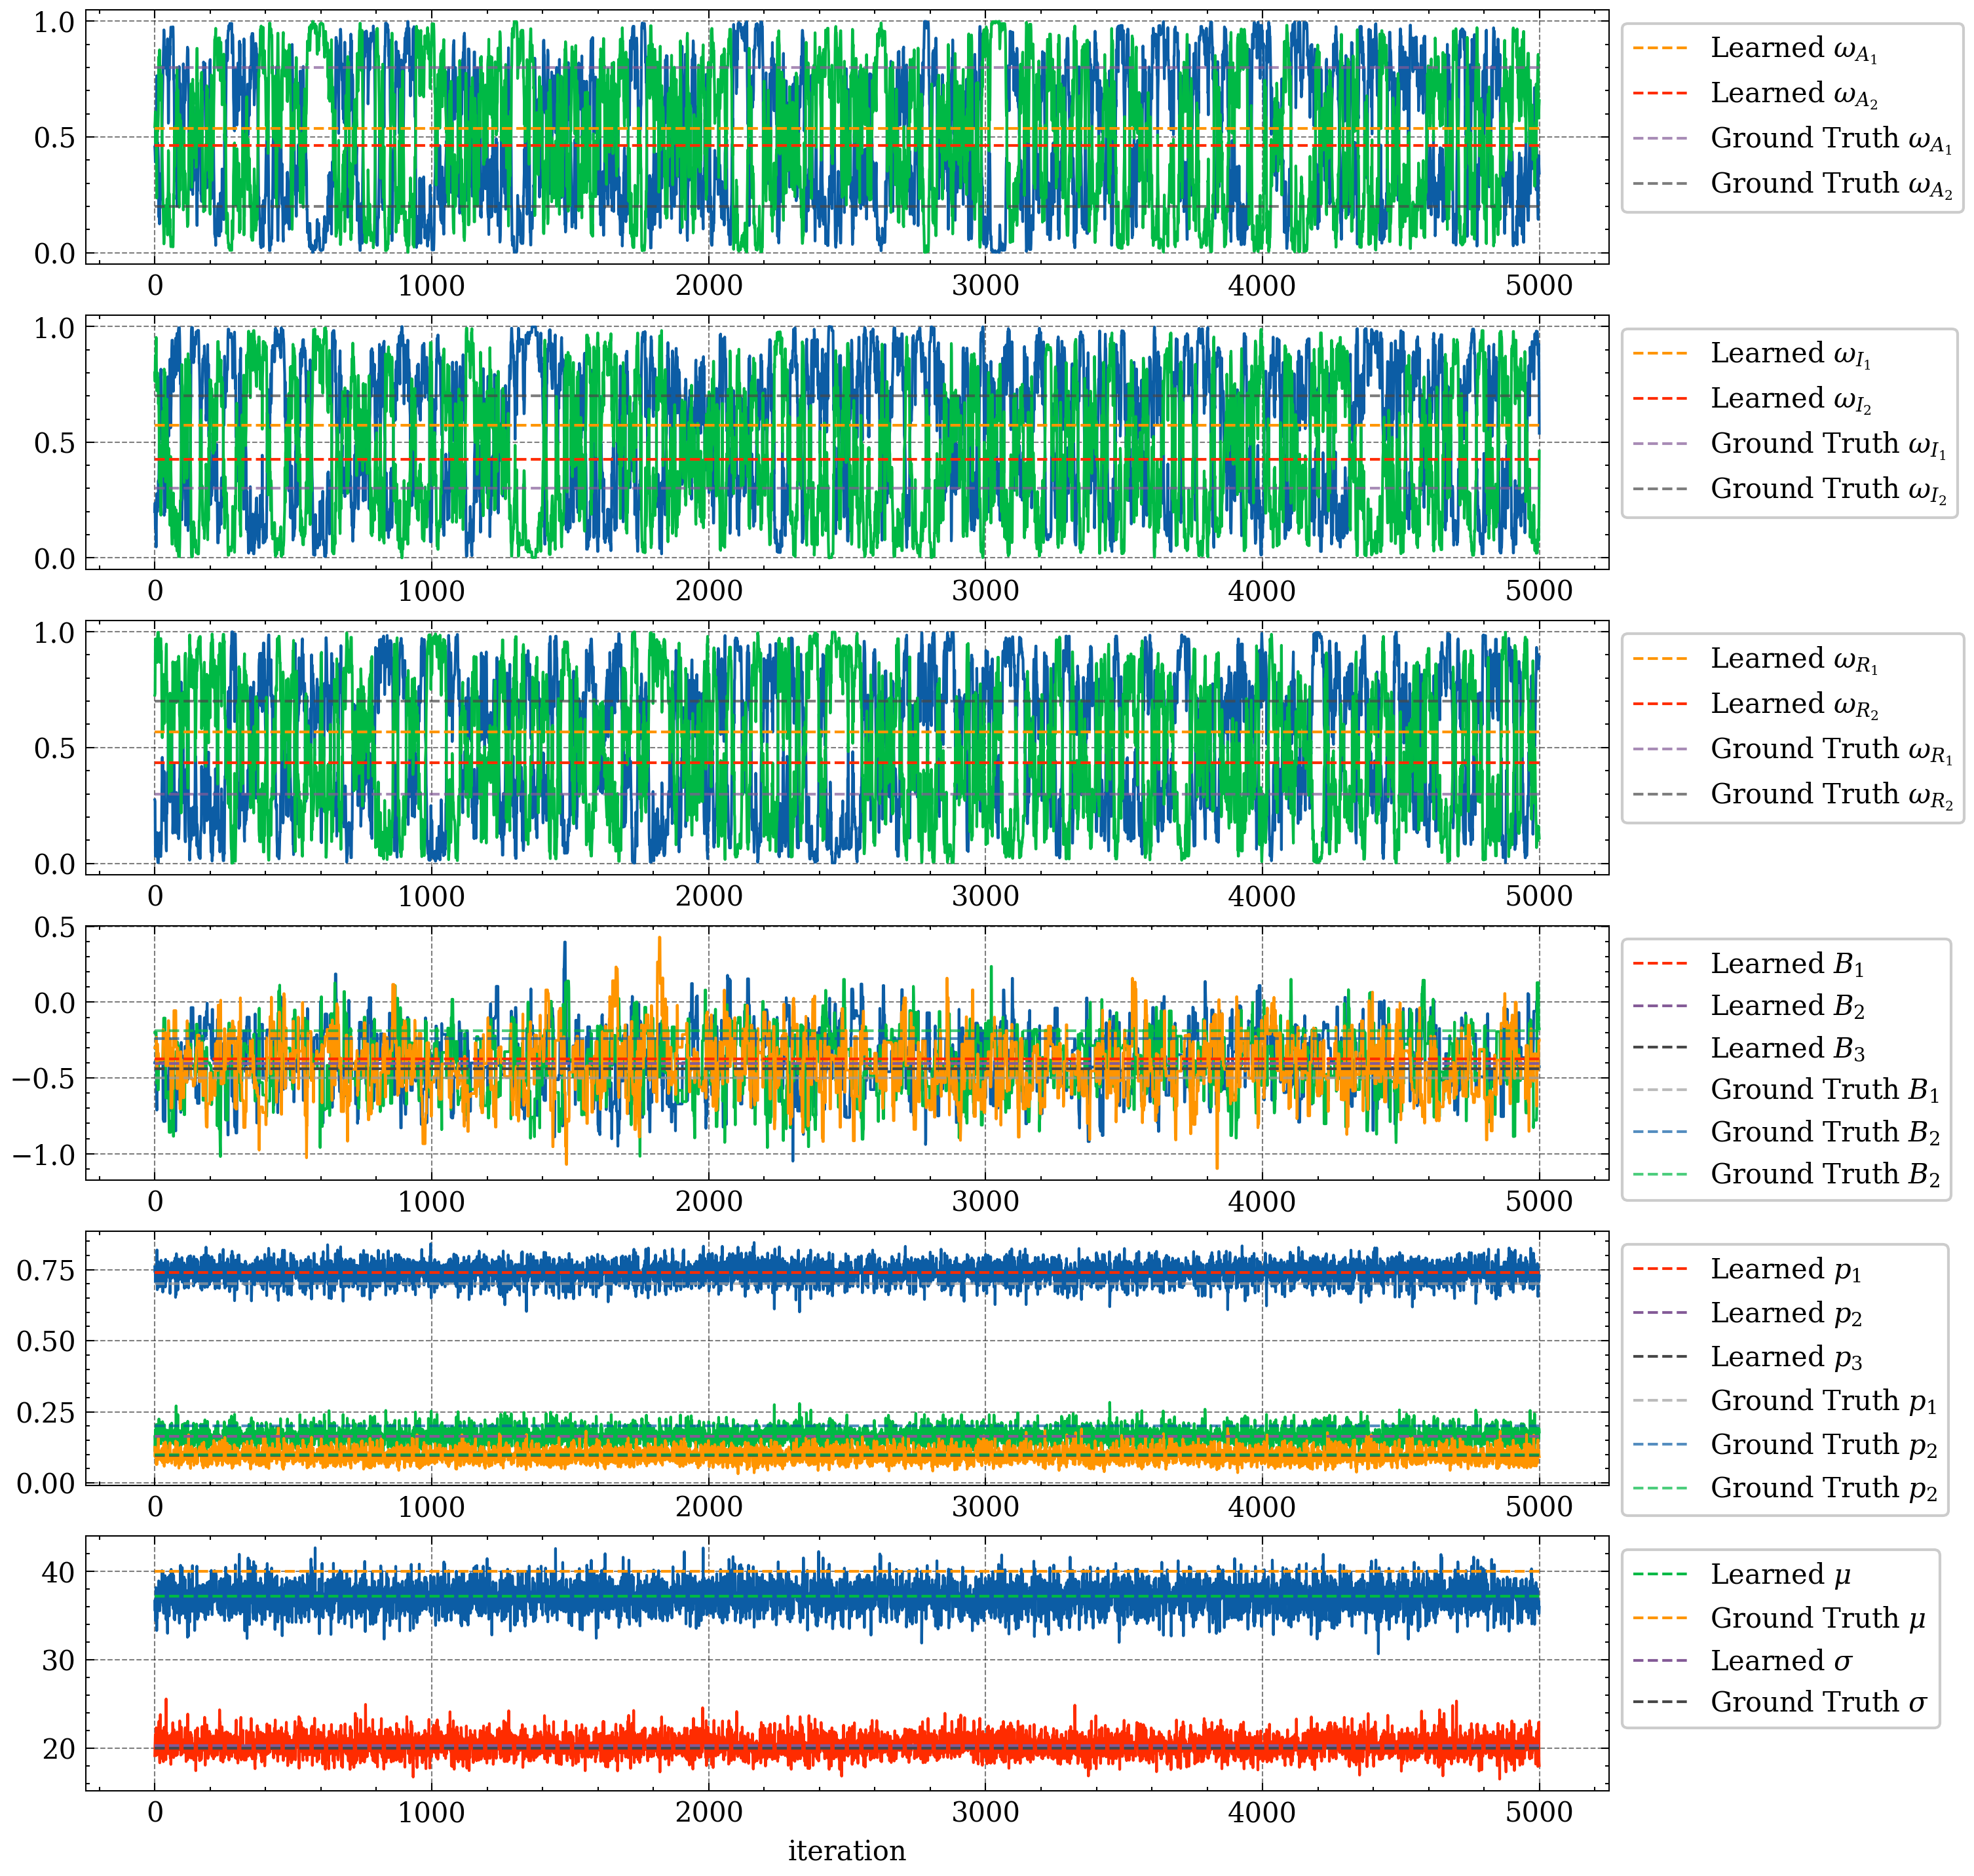

In [108]:
plt.figure(figsize=(10,12),dpi=300)
plt.subplot(611)
plt.plot(omega_A)
plt.plot((0,5000),(omega_A[2500::5].mean(axis=0)[0],omega_A[2500::5].mean(axis=0)[0]),'--',label='Learned $\omega_{A_1}$')
plt.plot((0,5000),(omega_A[2500::5].mean(axis=0)[1],omega_A[2500::5].mean(axis=0)[1]),'--',label='Learned $\omega_{A_2}$')
plt.plot((0,5000),(0.8,0.8),'--',alpha=0.7,label='Ground Truth $\omega_{A_1}$')
plt.plot((0,5000),(0.2,0.2),'--',alpha=0.7,label='Ground Truth $\omega_{A_2}$')
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(612)
plt.plot(omega_I)
plt.plot((0,5000),(omega_I[2500::5].mean(axis=0)[0],omega_I[2500::5].mean(axis=0)[0]),'--',label='Learned $\omega_{I_1}$')
plt.plot((0,5000),(omega_I[2500::5].mean(axis=0)[1],omega_I[2500::5].mean(axis=0)[1]),'--',label='Learned $\omega_{I_2}$')
plt.plot((0,5000),(0.3,0.3),'--',alpha=0.7,label='Ground Truth $\omega_{I_1}$')
plt.plot((0,5000),(0.7,0.7),'--',alpha=0.7,label='Ground Truth $\omega_{I_2}$')
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(613)
plt.plot(omega_R)
plt.plot((0,5000),(omega_R[2500::5].mean(axis=0)[0],omega_R[2500::5].mean(axis=0)[0]),'--',label='Learned $\omega_{R_1}$')
plt.plot((0,5000),(omega_R[2500::5].mean(axis=0)[1],omega_R[2500::5].mean(axis=0)[1]),'--',label='Learned $\omega_{R_2}$')
plt.plot((0,5000),(0.3,0.3),'--',alpha=0.7,label='Ground Truth $\omega_{R_1}$')
plt.plot((0,5000),(0.7,0.7),'--',alpha=0.7,label='Ground Truth $\omega_{R_2}$')
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(614)
plt.plot(B)
plt.plot((0,5000),(B[2500::5].mean(axis=0)[0],B[2500::5].mean(axis=0)[0]),'--',label='Learned ${B_1}$')
plt.plot((0,5000),(B[2500::5].mean(axis=0)[1],B[2500::5].mean(axis=0)[1]),'--',label='Learned ${B_2}$')
plt.plot((0,5000),(B[2500::5].mean(axis=0)[2],B[2500::5].mean(axis=0)[2]),'--',label='Learned ${B_3}$')
plt.plot((0,5000),(-0.5,-0.5),'--',alpha=0.7,label='Ground Truth ${B_1}$')
plt.plot((0,5000),(-0.24,-0.24),'--',alpha=0.7,label='Ground Truth ${B_2}$')
plt.plot((0,5000),(-0.19,-0.19),'--',alpha=0.7,label='Ground Truth ${B_2}$')
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(615)
plt.plot(p)
plt.plot((0,5000),(p.mean(axis=0)[0],p.mean(axis=0)[0]),'--',label='Learned $p_1$')
plt.plot((0,5000),(p.mean(axis=0)[1],p.mean(axis=0)[1]),'--',label='Learned $p_2$')
plt.plot((0,5000),(p.mean(axis=0)[2],p.mean(axis=0)[2]),'--',label='Learned $p_3$')
plt.plot((0,5000),(0.7,0.7),'--',alpha=0.7,label='Ground Truth $p_1$')
plt.plot((0,5000),(0.2,0.2),'--',alpha=0.7,label='Ground Truth $p_2$')
plt.plot((0,5000),(0.1,0.1),'--',alpha=0.7,label='Ground Truth $p_2$')
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(616)
plt.plot(mu)
plt.plot((0,5000),(mu.mean(),mu.mean()),'--',label='Learned $\mu$')
plt.plot((0,5000),(40,40),'--',label='Ground Truth $\mu$')

plt.plot(np.sqrt(sigmasq))
plt.plot((0,5000),(np.sqrt(sigmasq).mean(),np.sqrt(sigmasq).mean()),'--',label='Learned $\sigma$')
plt.plot((0,5000),(20,20),'--',label='Ground Truth $\sigma$')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('iteration')

In [116]:
test_data_incomplete_512 = np.load('data\test_data_incomplete_512.npy',allow_pickle=True).item()
test_data_complete_512 = np.load('data\data_test_complete_512.npy',allow_pickle=True).item()

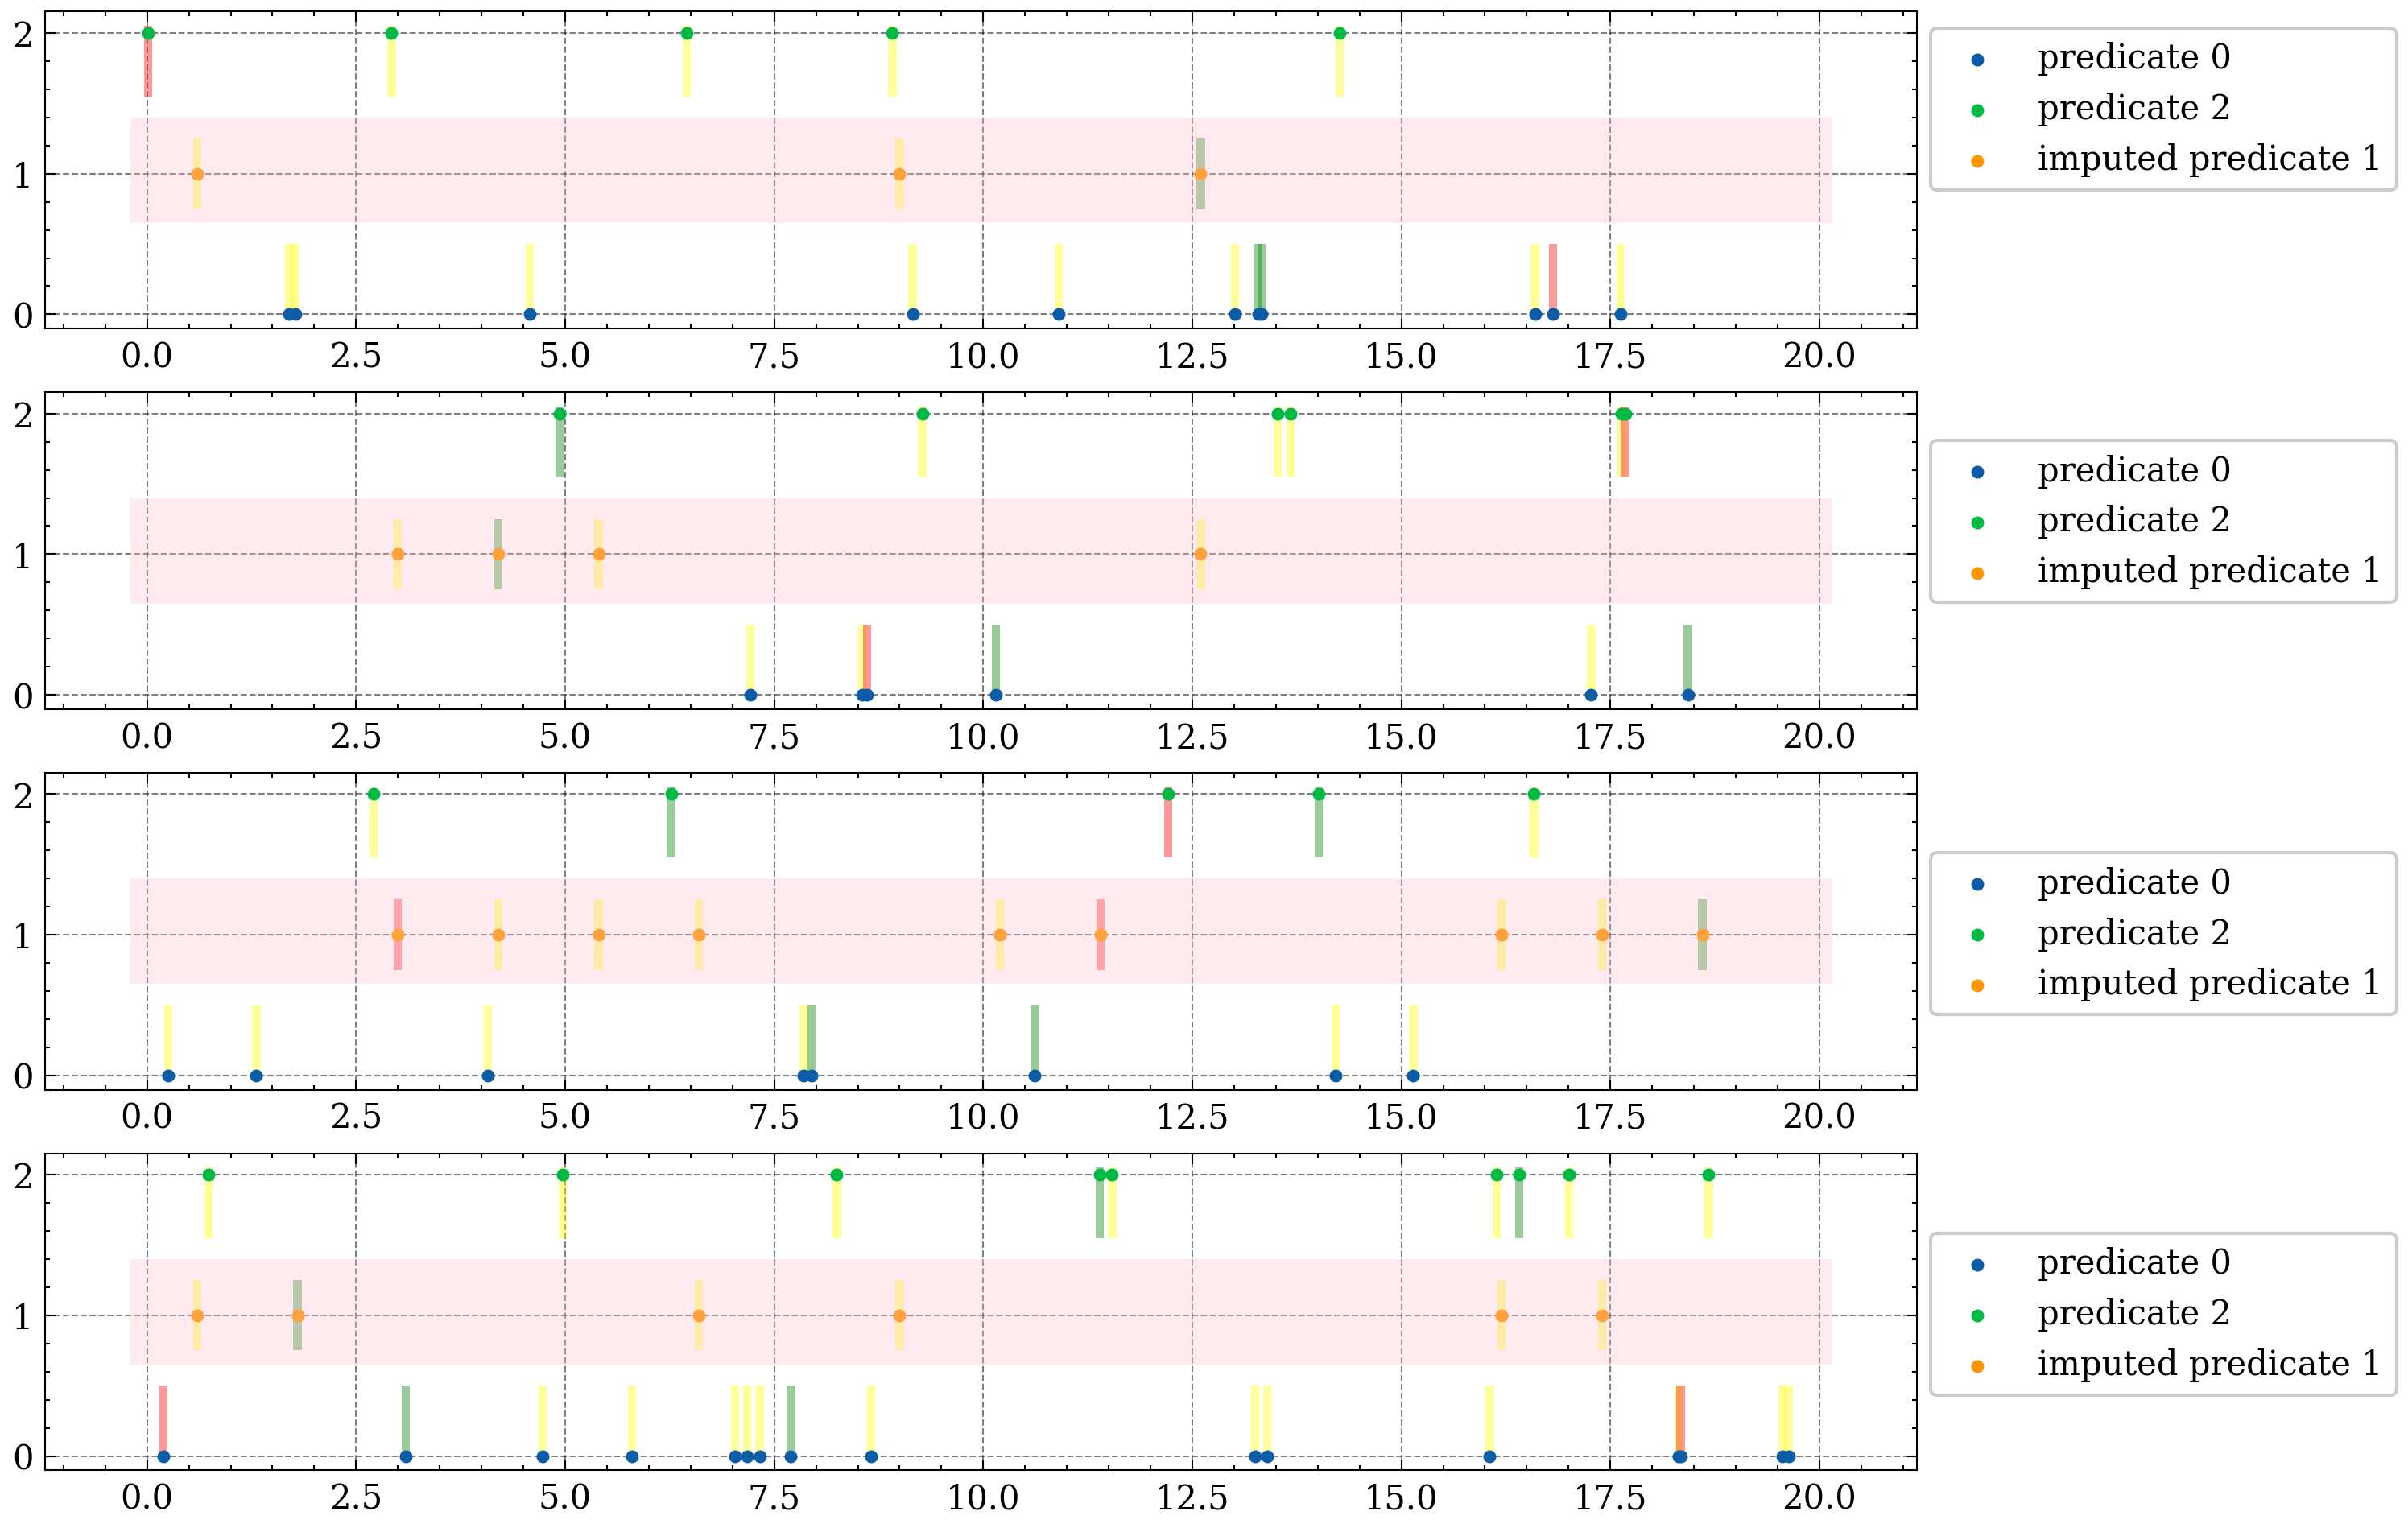

In [232]:
#random_idx = list(np.random.randint(0,512,size=4))
random_idx = [127, 457, 9, 304]
plt.figure(figsize=(10,8),dpi=300)
plt.subplot(411)
time = test_data_incomplete_512[random_idx[0]][0]['time']
marker = test_data_incomplete_512[random_idx[0]][0]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 0 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=8)

time = test_data_incomplete_512[random_idx[0]][2]['time']
marker = test_data_incomplete_512[random_idx[0]][2]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 2*np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=8)

time = test_data_complete_512[random_idx[0]][1]['time']
marker = test_data_complete_512[random_idx[0]][1]['marker']
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 1*np.ones(shape=len(time[1:])), label='imputed predicate {}'.format(1),s=8)
plt.fill_between(x=np.arange(-0.2,20.2,0.05),y1=0.65,y2=1.4,facecolor='pink',alpha=0.3)
plt.legend(bbox_to_anchor=(1.265,1))

plt.subplot(412)
time = test_data_incomplete_512[random_idx[1]][0]['time']
marker = test_data_incomplete_512[random_idx[1]][0]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 0 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=8)

time = test_data_incomplete_512[random_idx[1]][2]['time']
marker = test_data_incomplete_512[random_idx[1]][2]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 2*np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=8)

time = test_data_complete_512[random_idx[1]][1]['time']
marker = test_data_complete_512[random_idx[1]][1]['marker']
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 1*np.ones(shape=len(time[1:])), label='imputed predicate {}'.format(1),s=8)
plt.fill_between(x=np.arange(-0.2,20.2,0.05),y1=0.65,y2=1.4,facecolor='pink',alpha=0.3)
plt.legend(bbox_to_anchor=(1.265,0.9))

plt.subplot(413)
time = test_data_incomplete_512[random_idx[2]][0]['time']
marker = test_data_incomplete_512[random_idx[2]][0]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 0 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=8)

time = test_data_incomplete_512[random_idx[2]][2]['time']
marker = test_data_incomplete_512[random_idx[2]][2]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 2*np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=8)

time = test_data_complete_512[random_idx[2]][1]['time']
marker = test_data_complete_512[random_idx[2]][1]['marker']
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 1*np.ones(shape=len(time[1:])), label='imputed predicate {}'.format(1),s=8)
plt.fill_between(x=np.arange(-0.2,20.2,0.05),y1=0.65,y2=1.4,facecolor='pink',alpha=0.3)
plt.legend(bbox_to_anchor=(1.265,0.8))

plt.subplot(414)
time = test_data_incomplete_512[random_idx[3]][0]['time']
marker = test_data_incomplete_512[random_idx[3]][0]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 0 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=8)

time = test_data_incomplete_512[random_idx[3]][2]['time']
marker = test_data_incomplete_512[random_idx[3]][2]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 2*np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=8)

time = test_data_complete_512[random_idx[3]][1]['time']
marker = test_data_complete_512[random_idx[3]][1]['marker']
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 1*np.ones(shape=len(time[1:])), label='imputed predicate {}'.format(1),s=8)
plt.fill_between(x=np.arange(-0.2,20.2,0.05),y1=0.65,y2=1.4,facecolor='pink',alpha=0.3)
plt.legend(bbox_to_anchor=(1.265,0.8))

In [ ]:
plt.figure(figsize=(10,8),dpi=300)
random_idx = [100]
time = test_data_incomplete_512[random_idx[0]][0]['time']
marker = test_data_incomplete_512[random_idx[0]][0]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(-0,0.55,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 0 * np.ones(shape=len(time[1:])), label='predicate {}'.format(0),s=8)

time = test_data_incomplete_512[random_idx[0]][2]['time']
marker = test_data_incomplete_512[random_idx[0]][2]['marker'][1:]
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(1.55,2.1,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 2*np.ones(shape=len(time[1:])), label='predicate {}'.format(2),s=8)

time = test_data_complete_512[random_idx[0]][1]['time']
marker = test_data_complete_512[random_idx[0]][1]['marker']
for j in range(1,len(time)):
    if np.argmax(marker[j-1][:3]) == 0: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='yellow',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 1: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='green',alpha=0.4)
    if np.argmax(marker[j-1][:3]) == 2: plt.fill_betweenx(y=np.arange(0.75,1.3,0.1),x1=time[j]-delta,x2=time[j]+delta,facecolor='red',alpha=0.4)
plt.scatter(time[1:], 1*np.ones(shape=len(time[1:])), label='imputed predicate {}'.format(1),s=8)
plt.fill_between(x=np.arange(-0.2,20.2,0.05),y1=0.65,y2=1.4,facecolor='pink',alpha=0.3)
plt.legend(bbox_to_anchor=(1.265,1))